# WATER FOR AFRICA
## Huber Social Project 
**By Steve Makkar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [93]:
dataset = pd.read_excel("w4a_clean.xlsx", sheet_name = "Data", index_col = 0)

# Preview the imported datasets
display(dataset.head())
display(dataset.shape)


,Time Started,Date Submitted,Status,Group Number,I use the Water for Africa WellNote,Are there any symbols marked on the pages in red/pink marker?,Consent: I consent to my answers being used to help understand the needs of my community.,Gender,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,WELLBEING SCORE,F10000001,F10000002,F10000003,F10000004,F10000005,F10000048,F10000015,F10000051,F10000102,F10000103,F10000008,F10000009,F10000010,F10000049,F10000104,F10000006,F10000013,F10000105,F10000054,F10000106,I have a jobNote: Q25 changed from I have the skills I need to find a job. Participants should just have ticked 1/NO or 5/YES.,F10000680,F10000107,F10000108,F10000109,F10000010.1,F10000111,F10000112,F10000113,F10000114,F10000115,F10000065,F10000116,F10000117,F10000118,Any comments or issues on this particular survey?
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,2019-08-16 09:33:52,2019-08-16 09:35:11,Complete,1,No,NaN,Yes,Male,No,31-35,Married,500m â€“ 1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,Yes (5),5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,NaN
103,2019-08-16 09:35:45,2019-08-16 09:37:10,Complete,1,No,NaN,Yes,Female,No,31-35,Single,1km â€“ 5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,Yes (5),4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,NaN
104,2019-08-16 09:37:45,2019-08-16 09:39:11,Complete,1,No,NaN,Yes,Female,No,21-25,Married,Under 500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,Yes (5),5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,NaN
105,2019-08-16 09:39:56,2019-08-16 09:41:16,Complete,1,No,NaN,Yes,Male,No,26-30,Married,1km â€“ 5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,Yes (5),3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,NaN
106,2019-08-16 09:41:59,2019-08-16 09:43:38,Complete,1,No,NaN,Yes,Female,No,41-50,Married,1km â€“ 5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,No (1),3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,NaN


(266, 50)

## 1. DATA CLEANING
* The first phase of the data analysis is data cleaning
* Making sure that all data were entered correctly, and are within appropriate limits
* Recoding columns and making variables numeric (instead of string)

In [94]:
# Import the data dictionary to change the column names on the dataset
item_labels = pd.read_csv("huber_social_items.csv")

# Preview the imported labels
display(item_labels.head())

# Drop duplicated rows and no-na
item_labels = item_labels.drop_duplicates(subset = ["Number"]).dropna()

# Now change the column names in the W4A dataset
column_df = pd.DataFrame({"Number":list(dataset.columns)})
column_df = pd.merge(left = column_df, right = item_labels, on = "Number", how = 'left')
column_df["Item"] = np.where(column_df["Item"].isna() == True, column_df["Number"], column_df["Item"])
# Replace the Q25 to "I have a job" so it looks cleaner
column_df["Item"] = np.where(column_df["Item"].str.contains("I have a jobNote: Q25 changed from I have the") == True, "I have a job", column_df["Item"])
new_column_names = column_df["Item"]

# View the final list of column names - note that there are still some without labels (will fix this up later)
display(list(new_column_names))

# Now apply the column names to the w4a dataset
dataset.columns = new_column_names

# Preview the dataset with new column names
display(dataset.head())

,Item,Number
0,In most ways my life is close to great,F10000001
1,The conditions of my life are excellent,F10000002
2,I am satisfied with my life,F10000003
3,So far I have gotten the important things I wa...,F10000004
4,"If I could live my life over, I would change a...",F10000005


['Time Started',
 'Date Submitted',
 'Status',
 'Group Number',
 'I use the Water for Africa WellNote',
 'Are there any symbols marked on the pages in red/pink marker?',
 'Consent: I consent to my answers being used to help understand the needs of my community.',
 'Gender',
 'Disability',
 'Age',
 'Relationship Status:',
 'Access to water:',
 'Who collects the water in my family?',
 'WELLBEING SCORE',
 'In most ways my life is close to great',
 'The conditions of my life are excellent',
 'I am satisfied with my life',
 'So far I have gotten the important things I want in life',
 'If I could live my life over, I would change almost nothing',
 'I like myself',
 'My life has meaning',
 'I have things to hope for ',
 'I am able to ask for help when I need it',
 'I have free time to enjoy myself',
 'How often during the past month have you felt sad and unhappy?',
 'How much of the time, during the past month, have you been anxious?',
 'During the past month, how much of the time have you be

Item,Time Started,Date Submitted,Status,Group Number,I use the Water for Africa WellNote,Are there any symbols marked on the pages in red/pink marker?,Consent: I consent to my answers being used to help understand the needs of my community.,Gender,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,WELLBEING SCORE,In most ways my life is close to great,The conditions of my life are excellent,I am satisfied with my life,So far I have gotten the important things I want in life,"If I could live my life over, I would change almost nothing",I like myself,My life has meaning,I have things to hope for,I am able to ask for help when I need it,I have free time to enjoy myself,How often during the past month have you felt sad and unhappy?,"How much of the time, during the past month, have you been anxious?","During the past month, how much of the time have you been a happy person?",I feel afraid,I can provide my child/children with a good future,"In general, would you say your physical health is:","I feel connected to my community (a community is a group who you share interests or attitudes with. For example friends, cultural groups, religious groups, sport clubs, or neighbourhood groups)",I feel a meaningful connection with something bigger than myself,I can adapt when unexpected events happen,I can help provide for my family financially,I have a job,I get to spend time with people I care about,I have people in my community who help and support me,Lately it has been hard for my family to get clean water,I feel safe when I collect water,I feel my children are safe when they collect water,I have enough food for myself / my family,The food I eat gives me an upset stomach,I have time to tend to my farm and grow my own food,I can make decisions in my home,I can have a say in important issues in my community,My living environment is stable,I am able to practice my religion however I choose,I have access to medical services if my family or I need,I have enough money to live comfortably,Any comments or issues on this particular survey?
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,2019-08-16 09:33:52,2019-08-16 09:35:11,Complete,1,No,NaN,Yes,Male,No,31-35,Married,500m â€“ 1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,Yes (5),5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,NaN
103,2019-08-16 09:35:45,2019-08-16 09:37:10,Complete,1,No,NaN,Yes,Female,No,31-35,Single,1km â€“ 5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,Yes (5),4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,NaN
104,2019-08-16 09:37:45,2019-08-16 09:39:11,Complete,1,No,NaN,Yes,Female,No,21-25,Married,Under 500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,Yes (5),5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,NaN
105,2019-08-16 09:39:56,2019-08-16 09:41:16,Complete,1,No,NaN,Yes,Male,No,26-30,Married,1km â€“ 5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,Yes (5),3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,NaN
106,2019-08-16 09:41:59,2019-08-16 09:43:38,Complete,1,No,NaN,Yes,Female,No,41-50,Married,1km â€“ 5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,No (1),3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,NaN


In [95]:
# Drop some columns
dataset = dataset.drop(["Time Started",
                        "Date Submitted","Status",
                        "Are there any symbols marked on the pages in red/pink marker?",
                        "Any comments or issues on this particular survey?",
                        "Consent: I consent to my answers being used to help understand the needs of my community.",
                        ], axis = 1)

# display modified dataset
display(dataset.head())

Item,Group Number,I use the Water for Africa WellNote,Gender,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,WELLBEING SCORE,In most ways my life is close to great,The conditions of my life are excellent,I am satisfied with my life,So far I have gotten the important things I want in life,"If I could live my life over, I would change almost nothing",I like myself,My life has meaning,I have things to hope for,I am able to ask for help when I need it,I have free time to enjoy myself,How often during the past month have you felt sad and unhappy?,"How much of the time, during the past month, have you been anxious?","During the past month, how much of the time have you been a happy person?",I feel afraid,I can provide my child/children with a good future,"In general, would you say your physical health is:","I feel connected to my community (a community is a group who you share interests or attitudes with. For example friends, cultural groups, religious groups, sport clubs, or neighbourhood groups)",I feel a meaningful connection with something bigger than myself,I can adapt when unexpected events happen,I can help provide for my family financially,I have a job,I get to spend time with people I care about,I have people in my community who help and support me,Lately it has been hard for my family to get clean water,I feel safe when I collect water,I feel my children are safe when they collect water,I have enough food for myself / my family,The food I eat gives me an upset stomach,I have time to tend to my farm and grow my own food,I can make decisions in my home,I can have a say in important issues in my community,My living environment is stable,I am able to practice my religion however I choose,I have access to medical services if my family or I need,I have enough money to live comfortably
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,1,No,Male,No,31-35,Married,500m â€“ 1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,Yes (5),5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0
103,1,No,Female,No,31-35,Single,1km â€“ 5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,Yes (5),4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0
104,1,No,Female,No,21-25,Married,Under 500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,Yes (5),5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0
105,1,No,Male,No,26-30,Married,1km â€“ 5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,Yes (5),3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0
106,1,No,Female,No,41-50,Married,1km â€“ 5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,No (1),3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0


### Clean the string columns
* I will clean the string columns - some have weird values, others should be numeric

In [96]:
# First I will preview the string columns
dataset.select_dtypes(include='object').head()

Item,Group Number,I use the Water for Africa WellNote,Gender,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,I have a job
Response ID,,,,,,,,,
102,1,No,Male,No,31-35,Married,500m â€“ 1km,NaN,Yes (5)
103,1,No,Female,No,31-35,Single,1km â€“ 5km,NaN,Yes (5)
104,1,No,Female,No,21-25,Married,Under 500m,NaN,Yes (5)
105,1,No,Male,No,26-30,Married,1km â€“ 5km,NaN,Yes (5)
106,1,No,Female,No,41-50,Married,1km â€“ 5km,NaN,No (1)


#### Group Number

In [97]:
# Check the unique values in each column - are there any weird values
dataset["Group Number"].value_counts() # replace "T - Trainers + Councillors" to "T" for simplicity
dataset["Group Number"] = dataset["Group Number"].replace({"T - Trainers + Councillors":5})
dataset["Group Number"] = pd.to_numeric(dataset["Group Number"])


#### I use the Water for Africa Well

In [99]:
dataset["I use the Water for Africa WellNote"].value_counts()
# Change Yes to 1, No to 0, and "Did not answer" to NaN
dataset["I use the Water for Africa WellNote"] = dataset["I use the Water for Africa WellNote"].replace({"Yes":1,
                                                                                                        "No":0,
                                                                                                        "Did not answer/write anything":np.nan})
# Make this column numeric
dataset["I use the Water for Africa WellNote"] = pd.to_numeric(dataset["I use the Water for Africa WellNote"])
# Finall rename this column
dataset.rename(columns={"I use the Water for Africa WellNote":"Use w4A well"}, inplace=True)

#### Gender

In [100]:
# Replace, with Female = 1, Male = 0
dataset["Gender"] = dataset["Gender"].replace({"Female":1, "Male":0})
# Make the column numeric
dataset["Gender"] = pd.to_numeric(dataset["Gender"])
# Rename the column to "Female"
dataset.rename(columns={"Gender":"Female"}, inplace=True)

#### Disability

In [101]:
dataset['Disability'].value_counts()
# Replace No = 0, Yes = 1
dataset["Disability"] = dataset["Disability"].replace({"Yes":1, "No":0})
# Make the column numeric
dataset["Disability"] = pd.to_numeric(dataset["Disability"])

#### Age

36-40       59
41-50       38
51-60       34
26-30       33
31-35       32
21-25       23
61-70       20
16-20       20
71+          4
Under 15     1
Name: Age, dtype: int64

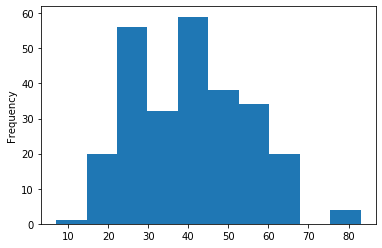

In [102]:
display(dataset['Age'].value_counts())
# For the purposes of this analysis, I will change age to continuous, and choose the median age
# in each age bin as the person's age

age_ranges = dataset['Age'].unique()
ages = [(31+35)/2, (21+25)/2, (26+30)/2, (41+50)/2, (51+60)/2, (36+40)/2, (15+20)/2, (0+14)/2, (61+70)/2, (71+95)/2, np.nan]
replacements = dict(list(zip(age_ranges,ages)))


# Now replace the categorical values to the numeric values
dataset['Age_continuous'] = dataset['Age'].replace(replacements)

# Make the column numeric
dataset["Age_continuous"] = pd.to_numeric(dataset["Age_continuous"])

import matplotlib.pyplot as plt
# Examine the distribution of the new age column
dataset['Age_continuous'].plot(kind='hist')
plt.show()

# the distribution looks normal! which is great. 

#### Relationship Status

In [103]:
display(dataset['Relationship Status:'].value_counts())

# Make a new binary column, "married", 0 if single/widowed, 1 if married
dataset["Widowed"] = np.where(dataset['Relationship Status:']=="Widowed",1,0)

# Convert the original Relationship Status column into dummy variables
dataset = pd.concat([dataset, pd.get_dummies(dataset[["Relationship Status:"]])], axis=1)
dataset.head()


Married    186
Single      41
Widowed     36
Name: Relationship Status:, dtype: int64

,Group Number,Use w4A well,Female,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,WELLBEING SCORE,In most ways my life is close to great,The conditions of my life are excellent,I am satisfied with my life,So far I have gotten the important things I want in life,"If I could live my life over, I would change almost nothing",I like myself,My life has meaning,I have things to hope for,I am able to ask for help when I need it,I have free time to enjoy myself,How often during the past month have you felt sad and unhappy?,"How much of the time, during the past month, have you been anxious?","During the past month, how much of the time have you been a happy person?",I feel afraid,I can provide my child/children with a good future,"In general, would you say your physical health is:","I feel connected to my community (a community is a group who you share interests or attitudes with. For example friends, cultural groups, religious groups, sport clubs, or neighbourhood groups)",I feel a meaningful connection with something bigger than myself,I can adapt when unexpected events happen,I can help provide for my family financially,I have a job,I get to spend time with people I care about,I have people in my community who help and support me,Lately it has been hard for my family to get clean water,I feel safe when I collect water,I feel my children are safe when they collect water,I have enough food for myself / my family,The food I eat gives me an upset stomach,I have time to tend to my farm and grow my own food,I can make decisions in my home,I can have a say in important issues in my community,My living environment is stable,I am able to practice my religion however I choose,I have access to medical services if my family or I need,I have enough money to live comfortably,Age_continuous,Widowed,Relationship Status:_Married,Relationship Status:_Single,Relationship Status:_Widowed
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,1,0.0,0,0.0,31-35,Married,500m â€“ 1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,Yes (5),5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,33.0,0,1,0,0
103,1,0.0,1,0.0,31-35,Single,1km â€“ 5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,Yes (5),4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,33.0,0,0,1,0
104,1,0.0,1,0.0,21-25,Married,Under 500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,Yes (5),5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,23.0,0,1,0,0
105,1,0.0,0,0.0,26-30,Married,1km â€“ 5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,Yes (5),3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,28.0,0,1,0,0
106,1,0.0,1,0.0,41-50,Married,1km â€“ 5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,No (1),3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,45.5,0,1,0,0


In [104]:
# First I will preview the string columns
dataset.select_dtypes(include='object').head()

,Age,Relationship Status:,Access to water:,Who collects the water in my family?,I have a job
Response ID,,,,,
102,31-35,Married,500m â€“ 1km,NaN,Yes (5)
103,31-35,Single,1km â€“ 5km,NaN,Yes (5)
104,21-25,Married,Under 500m,NaN,Yes (5)
105,26-30,Married,1km â€“ 5km,NaN,Yes (5)
106,41-50,Married,1km â€“ 5km,NaN,No (1)


#### Access to water

In [105]:
# Fix up the Access to water column
display(dataset["Access to water:"].value_counts())

# Create a binary column for less Under 1km, versus above 1km
dataset["Water_access_above1km"] = np.where((dataset['Access to water:']=="500m â€“ 1km")|(dataset['Access to water:']=="Under 500m"),1,0)

# Fix up the string values in the column
dataset["Access to water:"] = dataset["Access to water:"].apply(lambda x: str(x).replace(" â€“ ","-"))
dataset["Access to water:"] = dataset["Access to water:"].apply(lambda x: str(x).replace("Under ","<"))
dataset["Access to water:"] = dataset["Access to water:"].apply(lambda x: str(x).replace("Over ",">"))
dataset["Access to water:"] = dataset["Access to water:"].apply(lambda x: str(x).replace("kms","km"))

# Now, convert this to a dummy variable
dataset = pd.concat([dataset, pd.get_dummies(dataset[["Access to water:"]])], axis=1)

# Make anyone with NAN on the Access to water column, also NAN on the dummy columns
idx = pd.IndexSlice
dataset.loc[:,idx["Access to water:_1km-5km":"Access to water:_<500m"]] = dataset.loc[:,idx["Access to water:_1km-5km":"Access to water:_<500m"]].apply(lambda x: np.where(dataset["Access to water:_nan"]==1,np.nan,x))

# Finally, drop the NAN column
dataset = dataset.drop(["Access to water:_nan"], axis=1)

500m â€“ 1km    115
1km â€“ 5km      63
Under 500m       55
5km â€“ 10km     25
Over 10kms        6
Name: Access to water:, dtype: int64

#### Who collects water

In [106]:
dataset["Who collects the water in my family?"].value_counts()

# This column has a high proportion of missing values and will not be used in modelling

Adult woman      38
Elderly woman     6
Children          6
Adult man         5
Name: Who collects the water in my family?, dtype: int64

#### I have a job

In [107]:
# Change the "I have a job" column to numeric, No = 1, Yes = 5
display(dataset["I have a job"].value_counts())
dataset["I have a job"] = dataset["I have a job"].replace({"No (1)":1, "Yes (5)": 5})
dataset["I have a job"] = pd.to_numeric(dataset["I have a job"])
dataset.head()

No (1)     111
Yes (5)     90
Name: I have a job, dtype: int64

,Group Number,Use w4A well,Female,Disability,Age,Relationship Status:,Access to water:,Who collects the water in my family?,WELLBEING SCORE,In most ways my life is close to great,The conditions of my life are excellent,I am satisfied with my life,So far I have gotten the important things I want in life,"If I could live my life over, I would change almost nothing",I like myself,My life has meaning,I have things to hope for,I am able to ask for help when I need it,I have free time to enjoy myself,How often during the past month have you felt sad and unhappy?,"How much of the time, during the past month, have you been anxious?","During the past month, how much of the time have you been a happy person?",I feel afraid,I can provide my child/children with a good future,"In general, would you say your physical health is:","I feel connected to my community (a community is a group who you share interests or attitudes with. For example friends, cultural groups, religious groups, sport clubs, or neighbourhood groups)",I feel a meaningful connection with something bigger than myself,I can adapt when unexpected events happen,I can help provide for my family financially,I have a job,I get to spend time with people I care about,I have people in my community who help and support me,Lately it has been hard for my family to get clean water,I feel safe when I collect water,I feel my children are safe when they collect water,I have enough food for myself / my family,The food I eat gives me an upset stomach,I have time to tend to my farm and grow my own food,I can make decisions in my home,I can have a say in important issues in my community,My living environment is stable,I am able to practice my religion however I choose,I have access to medical services if my family or I need,I have enough money to live comfortably,Age_continuous,Widowed,Relationship Status:_Married,Relationship Status:_Single,Relationship Status:_Widowed,Water_access_above1km,Access to water:_1km-5km,Access to water:_500m-1km,Access to water:_5km-10km,Access to water:_<500m,Access to water:_>10km
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,1,0.0,0,0.0,31-35,Married,500m-1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,5.0,5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,33.0,0,1,0,0,1,0.0,1.0,0.0,0.0,0
103,1,0.0,1,0.0,31-35,Single,1km-5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,5.0,4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,33.0,0,0,1,0,0,1.0,0.0,0.0,0.0,0
104,1,0.0,1,0.0,21-25,Married,<500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,5.0,5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,23.0,0,1,0,0,1,0.0,0.0,0.0,1.0,0
105,1,0.0,0,0.0,26-30,Married,1km-5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,5.0,3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,28.0,0,1,0,0,0,1.0,0.0,0.0,0.0,0
106,1,0.0,1,0.0,41-50,Married,1km-5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,1.0,3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,45.5,0,1,0,0,0,1.0,0.0,0.0,0.0,0


### Explore the numeric columns
* I will examine the numeric columns - to see if the minimum and maximum values are within reasonable limits

In [108]:
np.round(dataset.describe(),1)

,Group Number,Use w4A well,Female,Disability,WELLBEING SCORE,In most ways my life is close to great,The conditions of my life are excellent,I am satisfied with my life,So far I have gotten the important things I want in life,"If I could live my life over, I would change almost nothing",I like myself,My life has meaning,I have things to hope for,I am able to ask for help when I need it,I have free time to enjoy myself,How often during the past month have you felt sad and unhappy?,"How much of the time, during the past month, have you been anxious?","During the past month, how much of the time have you been a happy person?",I feel afraid,I can provide my child/children with a good future,"In general, would you say your physical health is:","I feel connected to my community (a community is a group who you share interests or attitudes with. For example friends, cultural groups, religious groups, sport clubs, or neighbourhood groups)",I feel a meaningful connection with something bigger than myself,I can adapt when unexpected events happen,I can help provide for my family financially,I have a job,I get to spend time with people I care about,I have people in my community who help and support me,Lately it has been hard for my family to get clean water,I feel safe when I collect water,I feel my children are safe when they collect water,I have enough food for myself / my family,The food I eat gives me an upset stomach,I have time to tend to my farm and grow my own food,I can make decisions in my home,I can have a say in important issues in my community,My living environment is stable,I am able to practice my religion however I choose,I have access to medical services if my family or I need,I have enough money to live comfortably,Age_continuous,Widowed,Relationship Status:_Married,Relationship Status:_Single,Relationship Status:_Widowed,Water_access_above1km,Access to water:_1km-5km,Access to water:_500m-1km,Access to water:_5km-10km,Access to water:_<500m,Access to water:_>10km
count,266.0,261.0,266.0,264.0,266.0,265.0,265.0,264.0,264.0,263.0,266.0,266.0,266.0,265.0,266.0,266.0,266.0,265.0,266.0,265.0,263.0,265.0,262.0,260.0,266.0,201.0,266.0,264.0,265.0,265.0,265.0,265.0,265.0,266.0,264.0,266.0,266.0,264.0,264.0,263.0,264.0,266.0,266.0,266.0,266.0,266.0,264.0,264.0,264.0,264.0,266.0
mean,2.6,0.2,0.4,0.0,2.6,2.3,2.2,2.3,2.3,3.9,3.5,4.2,3.9,3.7,3.0,3.0,3.0,3.0,3.0,3.0,3.1,3.5,4.0,3.3,2.7,2.8,3.4,2.9,1.7,1.9,1.7,2.9,3.1,3.5,3.5,3.6,3.5,4.4,3.1,1.8,39.3,0.1,0.7,0.2,0.1,0.6,0.2,0.4,0.1,0.2,0.0
std,1.2,0.4,0.5,0.2,0.7,1.2,0.9,0.9,1.0,1.3,1.4,1.2,1.3,1.4,1.2,1.0,1.1,0.9,1.1,1.2,1.3,1.2,1.3,1.2,1.2,2.0,1.2,1.1,1.1,1.1,1.0,1.1,1.4,1.2,1.2,1.1,1.3,1.1,1.3,0.9,14.3,0.3,0.5,0.4,0.3,0.5,0.4,0.5,0.3,0.4,0.1
min,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,0.0,2.2,1.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.0,0.0,0.0,2.6,2.0,2.0,2.0,2.0,5.0,3.0,5.0,4.5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0,38.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,4.0,3.8,5.0,5.0,4.0,2.0,3.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,45.5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
max,5.0,1.0,1.0,1.0,4.4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,83.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* Scanning the minimum and maximum values of all columns indicates that all columns are within reasonable limits
* Below will confirm, for all items in the wellbeing questionnaire, that no items are outside the 1-5 bounds
* The 0's indicate that NO items are outside these bounds

In [109]:
# Get descriptives - check if all survey items have appropriate minimum and maximum values - both sums should be 0
display((dataset.loc[:,idx["WELLBEING SCORE":"I am able to practice my religion however I choose"]].describe().loc["min"] < 1).sum())
display((dataset.loc[:,idx["WELLBEING SCORE":"I am able to practice my religion however I choose"]].describe().loc["max"] > 5).sum())

0

0

### Clean the column names
* Make all lower case and replace spaces with underscores, for simplicity
* Remove all non characters also
* Save a new version of the dataset with the cleaned column names

In [110]:
list(dataset.columns)

['Group Number',
 'Use w4A well',
 'Female',
 'Disability',
 'Age',
 'Relationship Status:',
 'Access to water:',
 'Who collects the water in my family?',
 'WELLBEING SCORE',
 'In most ways my life is close to great',
 'The conditions of my life are excellent',
 'I am satisfied with my life',
 'So far I have gotten the important things I want in life',
 'If I could live my life over, I would change almost nothing',
 'I like myself',
 'My life has meaning',
 'I have things to hope for ',
 'I am able to ask for help when I need it',
 'I have free time to enjoy myself',
 'How often during the past month have you felt sad and unhappy?',
 'How much of the time, during the past month, have you been anxious?',
 'During the past month, how much of the time have you been a happy person?',
 'I feel afraid',
 'I can provide my child/children with a good future',
 'In general, would you say your physical health is:',
 'I feel connected to my community (a community is a group who you share interest

In [111]:
import re
clean_colnames = [re.sub(':|\?|,|/|/|\.|\(|\)','',((str(column).lower()).replace(" ","_"))) for column in list(dataset.columns)]
df = dataset.copy()
df.columns = clean_colnames


In [112]:
# There are a couple very long column names we will fix as well
df.rename(columns = {'i_feel_connected_to_my_community_a_community_is_a_group_who_you_share_interests_or_attitudes_with_for_example_friends_cultural_groups_religious_groups_sport_clubs_or_neighbourhood_groups':"i_feel_connected_to_my_community",
                     'i_have_things_to_hope_for_':'i_have_things_to_hope_for',
                     'i_can_help_provide_for_my_family_financially_':'i_can_help_provide_for_my_family_financially',
                     'lately_it_has_been_hard_for_my_family_to_get_clean_water_':'lately_it_has_been_hard_for_my_family_to_get_clean_water',
                     'i_can_provide_my_childchildren_with_a_good_future':'i_can_provide_my_child_children_with_a_good_future',
                     }, inplace=True)

In [113]:
list(df.columns)


['group_number',
 'use_w4a_well',
 'female',
 'disability',
 'age',
 'relationship_status',
 'access_to_water',
 'who_collects_the_water_in_my_family',
 'wellbeing_score',
 'in_most_ways_my_life_is_close_to_great',
 'the_conditions_of_my_life_are_excellent',
 'i_am_satisfied_with_my_life',
 'so_far_i_have_gotten_the_important_things_i_want_in_life',
 'if_i_could_live_my_life_over_i_would_change_almost_nothing',
 'i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_often_during_the_past_month_have_you_felt_sad_and_unhappy',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_feel_afraid',
 'i_can_provide_my_child_children_with_a_good_future',
 'in_general_would_you_say_your_physical_health_is',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_th

# DESCRIPTIVE STATISTICS - Exploratory Data Analysis
* Below, creating some visualisations to describe the study sample

In [114]:
df.head()

,group_number,use_w4a_well,female,disability,age,relationship_status,access_to_water,who_collects_the_water_in_my_family,wellbeing_score,in_most_ways_my_life_is_close_to_great,the_conditions_of_my_life_are_excellent,i_am_satisfied_with_my_life,so_far_i_have_gotten_the_important_things_i_want_in_life,if_i_could_live_my_life_over_i_would_change_almost_nothing,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_often_during_the_past_month_have_you_felt_sad_and_unhappy,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_feel_afraid,i_can_provide_my_child_children_with_a_good_future,in_general_would_you_say_your_physical_health_is,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_can_adapt_when_unexpected_events_happen,i_can_help_provide_for_my_family_financially,i_have_a_job,i_get_to_spend_time_with_people_i_care_about,i_have_people_in_my_community_who_help_and_support_me,lately_it_has_been_hard_for_my_family_to_get_clean_water,i_feel_safe_when_i_collect_water,i_feel_my_children_are_safe_when_they_collect_water,i_have_enough_food_for_myself__my_family,the_food_i_eat_gives_me_an_upset_stomach,i_have_time_to_tend_to_my_farm_and_grow_my_own_food,i_can_make_decisions_in_my_home,i_can_have_a_say_in_important_issues_in_my_community,my_living_environment_is_stable,i_am_able_to_practice_my_religion_however_i_choose,i_have_access_to_medical_services_if_my_family_or_i_need,i_have_enough_money_to_live_comfortably,age_continuous,widowed,relationship_status_married,relationship_status_single,relationship_status_widowed,water_access_above1km,access_to_water_1km-5km,access_to_water_500m-1km,access_to_water_5km-10km,access_to_water_<500m,access_to_water_>10km
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,1,0.0,0,0.0,31-35,Married,500m-1km,NaN,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,5.0,5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,33.0,0,1,0,0,1,0.0,1.0,0.0,0.0,0
103,1,0.0,1,0.0,31-35,Single,1km-5km,NaN,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,5.0,4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,33.0,0,0,1,0,0,1.0,0.0,0.0,0.0,0
104,1,0.0,1,0.0,21-25,Married,<500m,NaN,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,5.0,5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,23.0,0,1,0,0,1,0.0,0.0,0.0,1.0,0
105,1,0.0,0,0.0,26-30,Married,1km-5km,NaN,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,5.0,3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,28.0,0,1,0,0,0,1.0,0.0,0.0,0.0,0
106,1,0.0,1,0.0,41-50,Married,1km-5km,NaN,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,1.0,3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,45.5,0,1,0,0,0,1.0,0.0,0.0,0.0,0


In [115]:
df['age'].unique()

array(['31-35', '21-25', '26-30', '41-50', '51-60', '36-40', '16-20',
       'Under 15', '61-70', '71+', nan], dtype=object)

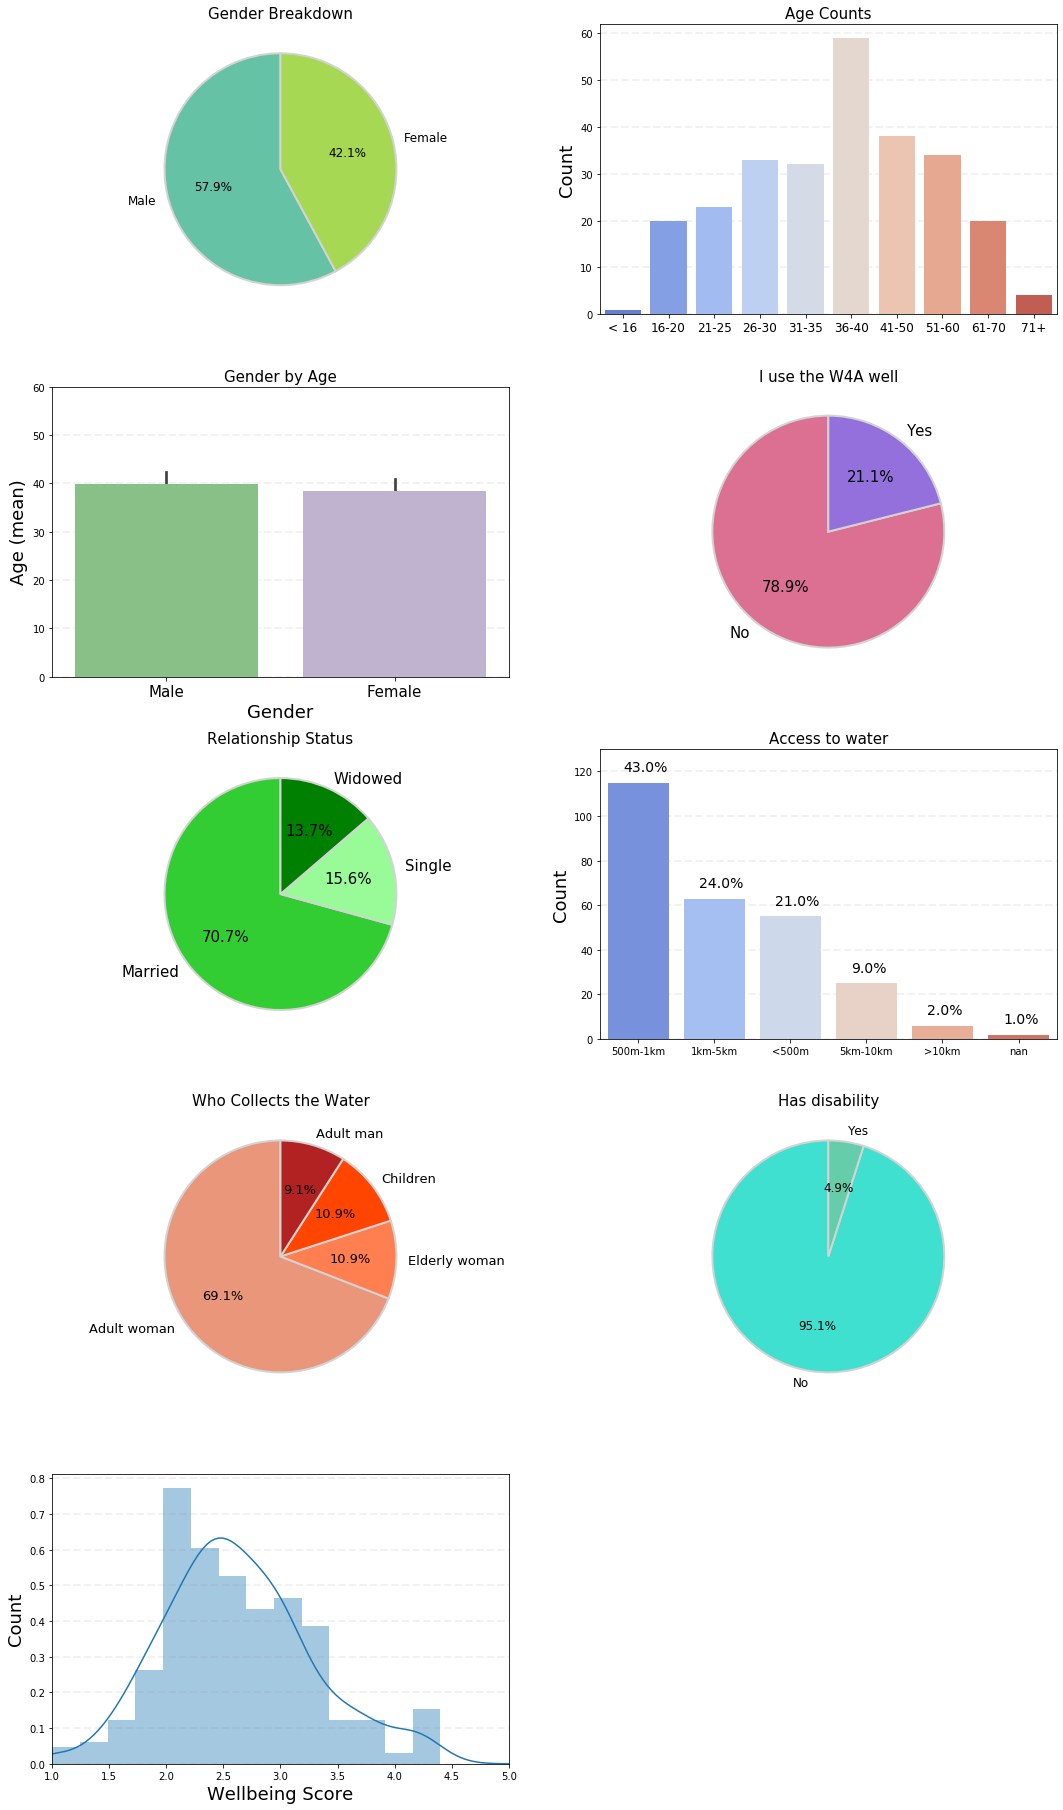

In [641]:
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from matplotlib import cm # import color maps

cs=cm.Set2(np.arange(40)/2.) # I can change the palette, by changing the SET (set1, set2) - and the denominator, is how many colours I want

# Gender Breakdown
fig, ax = plt.subplots(5,2, figsize = (18,32))
plt.subplots_adjust(hspace=0.25)

df['female'].value_counts().plot(kind = 'pie', ax = ax[0,0],
                                 labels=['Male','Female'], 
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 fontsize=12,
                                 colors = cs,
                                 wedgeprops = {'linewidth': 2, 'edgecolor' : 'lightgray'})
ax[0,0].set_title("Gender Breakdown", fontsize = 15)
ax[0,0].get_yaxis().set_visible(False) # Hide the y-axis


# Age
ax[0,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.countplot(data = df, x = "age_continuous", ax = ax[0,1], palette = "coolwarm", zorder=3)
ax[0,1].set_xticklabels(['< 16','16-20','21-25','26-30','31-35','36-40','41-50','51-60','61-70','71+'],
                        fontsize = 12)
ax[0,1].set_title("Age Counts", fontsize = 15)
ax[0,1].set_xlabel("", fontsize=18)
ax[0,1].set_ylabel("Count", fontsize=18)


# Next plot relationship between gender and age
ax[1,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df, x = "female", y = "age_continuous", palette = "Accent", ax = ax[1,0], zorder=3)
ax[1,0].set_xticklabels(['Male','Female'],fontsize = 15)
ax[1,0].set_title("Gender by Age", fontsize = 15)
ax[1,0].set_xlabel("Gender", fontsize=18)
ax[1,0].set_ylabel("Age (mean)", fontsize=18)
ax[1,0].set_ylim(0,60)

# Using the well
cs2=cm.Set3(np.arange(6,40)/2.)
df['use_w4a_well'].value_counts().plot(kind = 'pie', ax = ax[1,1],
                                 labels=['No','Yes'], 
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 fontsize=15,
                                 colors = ['palevioletred','mediumpurple'],
                                 wedgeprops = {'linewidth': 2, 'edgecolor' : 'lightgray'})
ax[1,1].set_title("I use the W4A well", fontsize = 15)
ax[1,1].get_yaxis().set_visible(False) # Hide the y-axis


# Relationship Status
cs2=cm.Set3(np.arange(6,40)/2.)
df['relationship_status'].value_counts().plot(kind = 'pie', ax = ax[2,0], 
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 fontsize=15,
                                 colors = ['limegreen','palegreen','green'],
                                 wedgeprops = {'linewidth': 2, 'edgecolor' : 'lightgray'})
ax[2,0].set_title("Relationship Status", fontsize = 15)
ax[2,0].get_yaxis().set_visible(False) # Hide the y-axis


# Access to Water
ax[2,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.countplot(data = df, x = "access_to_water", ax = ax[2,1], palette = "coolwarm", zorder=3)
ax[2,1].set_title("Access to water", fontsize = 15)
ax[2,1].set_xlabel("", fontsize=18)
ax[2,1].set_ylabel("Count", fontsize=18)
ax[2,1].set_ylim(0,130)

percentages = np.round((list(df["access_to_water"].value_counts()/df.shape[0])), 2)*100
heights = list(df["access_to_water"].value_counts()+5)
xdistances = np.arange(0,len(df["access_to_water"].unique()))-0.2

for x, y, v in zip(xdistances,heights,percentages):
    ax[2,1].text(x,y,'{}%'.format(v), fontsize=14)
    
# Using the well
cs2=cm.Set3(np.arange(6,40)/2.)
df['who_collects_the_water_in_my_family'].value_counts().plot(kind = 'pie', ax = ax[3,0],
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 fontsize=13,
                                 colors = ['darksalmon','coral','orangered','firebrick'],
                                 wedgeprops = {'linewidth': 2, 'edgecolor' : 'lightgray'})
ax[3,0].set_title("Who Collects the Water", fontsize = 15)
ax[3,0].get_yaxis().set_visible(False) # Hide the y-axis

ax[4,1].axis('off')

# Disabled

df['disability'].value_counts().plot(kind = 'pie', ax = ax[3,1],
                                 labels=['No','Yes'], 
                                 autopct='%1.1f%%', # this is essential to add the percentage text
                                 startangle=90,
                                 fontsize=12,
                                 colors = ["turquoise","mediumaquamarine"], # using a 
                                 wedgeprops = {'linewidth': 2, 'edgecolor' : 'lightgray'})
ax[3,1].set_title("Has disability", fontsize = 15)
ax[3,1].get_yaxis().set_visible(False) # Hide the y-axis


## WELLBEING

ax[4,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.distplot(df['wellbeing_score'], ax = ax[4,0]);

# sns.countplot(data = df, x = "wellbeing_score", ax = ax[4,0], palette = "coolwarm", zorder=3)
# # ax[0,1].set_xticklabels(['< 16','16-20','21-25','26-30','31-35','36-40','41-50','51-60','61-70','71+'],
# #                         fontsize = 12)
# ax[4,0].set_title("Age Counts", fontsize = 15)
ax[4,0].set_xlabel("Wellbeing Score", fontsize=18)
ax[4,0].set_ylabel("Count", fontsize=18)
ax[4,0].set_xlim(1,5)


plt.show()

## Relationships with wellbeing

* Below I have created some visualisations to preview relationships between demographic variables and wellbeing

In [117]:
dfplot = df.copy()
dfplot['Age Range'] = pd.qcut(dfplot['age_continuous'], 4)
display(dfplot['Age Range'].unique())

[(28.0, 38.0], (6.999, 28.0], (38.0, 45.5], (45.5, 83.0], NaN]
Categories (4, interval[float64]): [(6.999, 28.0] < (28.0, 38.0] < (38.0, 45.5] < (45.5, 83.0]]

In [543]:
dfplot['lately_it_has_been_hard_for_my_family_to_get_clean_water']

Response ID
102    4.0
103    2.0
104    5.0
105    1.0
106    3.0
107    1.0
108    1.0
109    2.0
110    3.0
111    1.0
112    1.0
113    1.0
114    1.0
115    2.0
116    2.0
117    1.0
118    2.0
119    2.0
120    1.0
121    2.0
122    1.0
124    1.0
125    1.0
126    1.0
127    3.0
128    1.0
129    1.0
130    3.0
131    1.0
132    1.0
133    1.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
141    1.0
142    4.0
143    4.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
150    1.0
151    4.0
152    3.0
153    3.0
154    1.0
155    1.0
5      1.0
6      1.0
7      2.0
8      5.0
9      5.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     2.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     3.0
32     1.0
33     1.0
34     2.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0
41     1.0
42     NaN
43     1.

In [544]:
dfplot['Hard to collect water'] = pd.qcut(dfplot['lately_it_has_been_hard_for_my_family_to_get_clean_water'], 2, duplicates ='drop')

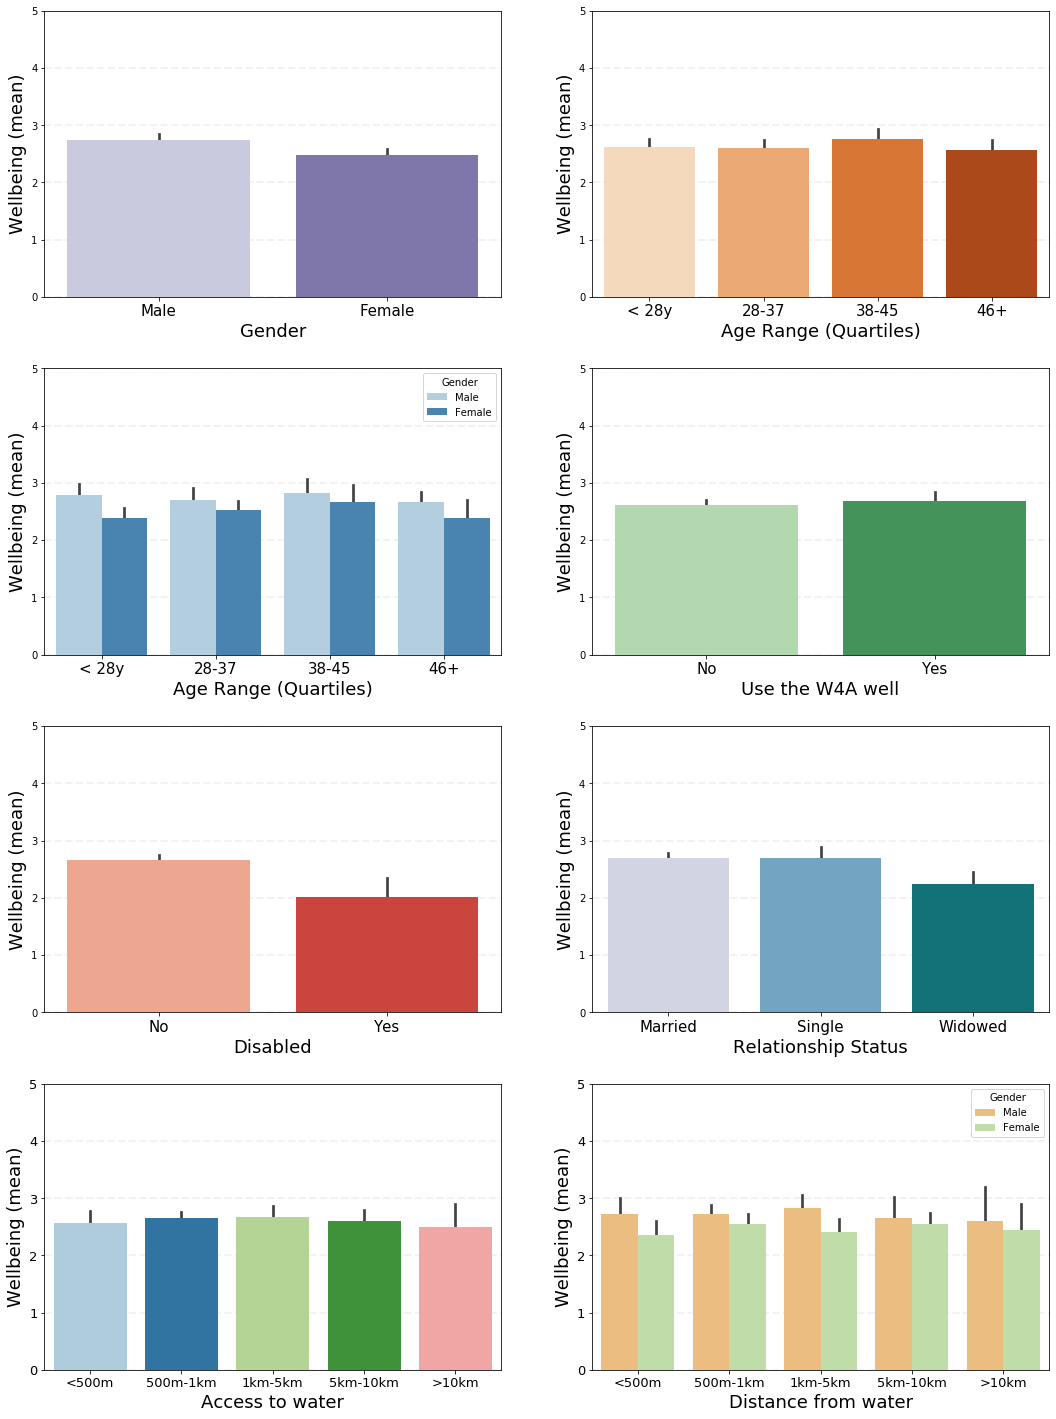

In [592]:
fig, ax = plt.subplots(4,2, figsize = (18,25))
plt.subplots_adjust(hspace=0.25)

ax[0,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df, x = "female", y = "wellbeing_score", palette = "Purples", ax = ax[0,0], zorder=3)
ax[0,0].set_xticklabels(['Male','Female'],fontsize = 15)
# ax[0,0].set_title("Gender", fontsize = 15)
ax[0,0].set_xlabel("Gender", fontsize=18)
ax[0,0].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[0,0].set_ylim(0,5)

ax[0,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = dfplot, x = "Age Range", y = "wellbeing_score", palette = "Oranges", ax = ax[0,1], zorder=3)
ax[0,1].set_xticklabels(['< 28y', '28-37', '38-45', '46+'],fontsize = 15)
# ax[0,1].set_title("Age", fontsize = 15)
ax[0,1].set_xlabel("Age Range (Quartiles)", fontsize=18)
ax[0,1].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[0,1].set_ylim(0,5)

# AGe by gender
ax[1,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = dfplot, x = "Age Range", y = "wellbeing_score", 
            hue = "female",
            palette = "Blues", ax = ax[1,0], zorder=3)
ax[1,0].set_xticklabels(['< 28y', '28-37', '38-45', '46+'],fontsize = 15)
# ax[0,1].set_title("Age", fontsize = 15)
ax[1,0].set_xlabel("Age Range (Quartiles)", fontsize=18)
ax[1,0].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[1,0].set_ylim(0,5)
h, l = ax[1,0].get_legend_handles_labels() # Note the complexity of making thsi legend!! Otherwise, they lose color!
ax[1,0].legend(h, ["Male","Female"], title="Gender")

# Use of the well
ax[1,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df, x = "use_w4a_well", y = "wellbeing_score", palette = "Greens", ax = ax[1,1], zorder=3)
ax[1,1].set_xticklabels(['No','Yes'],fontsize = 15)
# ax[1,1].set_title("Use the W4A well", fontsize = 15)
ax[1,1].set_xlabel("Use the W4A well", fontsize=18)
ax[1,1].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[1,1].set_ylim(0,5)

# disability? 
ax[2,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df, x = "disability", y = "wellbeing_score", palette = "Reds", ax = ax[2,0], zorder=3)
ax[2,0].set_xticklabels(['No','Yes'],fontsize = 15)
# ax[1,1].set_title("Use the W4A well", fontsize = 15)
ax[2,0].set_xlabel("Disabled", fontsize=18)
ax[2,0].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[2,0].set_ylim(0,5)

# Relationship status? 
ax[2,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df, x = "relationship_status", y = "wellbeing_score", palette = "PuBuGn", 
            ax = ax[2,1], zorder=3)
ax[2,1].set_xticklabels(["Married","Single","Widowed"], fontsize = 15)
# ax[2,1].set_title("Use the W4A well", fontsize = 15)
ax[2,1].set_xlabel("Relationship Status", fontsize=18)
ax[2,1].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[2,1].set_ylim(0,5)


# Access to water? 
# First make it categorical

df_plot_simple = dfplot.loc[(dfplot['access_to_water']!='nan'),:]
df_plot_simple['access_to_water'] = pd.Categorical(df_plot_simple['access_to_water'], ordered=True, categories=['<500m', '500m-1km', '1km-5km','5km-10km', '>10km'])
ax[3,0].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df_plot_simple, x = "access_to_water", y = "wellbeing_score", palette = "Paired", ax = ax[3,0], zorder=3)
ax[3,0].tick_params(axis = 'both', which = 'major', labelsize = 13)
ax[3,0].set_xlabel("Access to water", fontsize=18)
ax[3,0].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[3,0].set_ylim(0,5)


# Gender by Water

ax[3,1].grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'y')
sns.barplot(data = df_plot_simple, x = "access_to_water", y = "wellbeing_score", 
            hue = "female",
            palette = "Spectral", ax = ax[3,1], zorder=3)
ax[3,1].tick_params(axis = 'both', which = 'major', labelsize = 13) # set tick size
# ax[3,1].set_title("Age", fontsize = 15)
ax[3,1].set_xlabel("Distance from water", fontsize=18)
ax[3,1].set_ylabel("Wellbeing (mean)", fontsize=18)
ax[3,1].set_ylim(0,5)
h, l = ax[3,1].get_legend_handles_labels() # Note the complexity of making thsi legend!! Otherwise, they lose color!
ax[3,1].legend(h, ["Male","Female"], title="Gender")


plt.show()

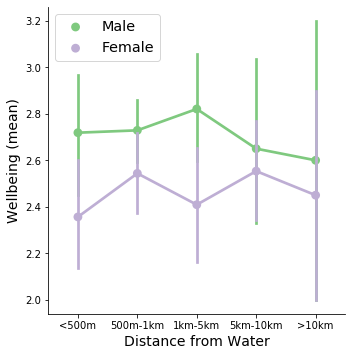

In [642]:
df_plot_simple["gender"] = df_plot_simple["female"].replace({0:'Male',1:'Female'})
g = sns.catplot(x='access_to_water', 
            y="wellbeing_score", hue="gender", kind="point", data=df_plot_simple,
           palette = "Accent",
               legend='False')
plt.ylabel("Wellbeing (mean)", fontsize=14)
plt.xlabel("Distance from Water", fontsize=14)
plt.legend(fontsize='x-large', title_fontsize='40')
g._legend.remove()

In [591]:
simple["access_to_water"].unique()

-1km, 1km-5km, <500m, 5km-10km, >10km]
Categories (5, object): [<500m < 500m-1km < 1km-5km < 5km-10km < >10km]

In [596]:
dfplot['hard_get_water'] = pd.qcut(dfplot['lately_it_has_been_hard_for_my_family_to_get_clean_water'],
                                  3, duplicates="drop")
dfplot['safe_get_water'] = pd.qcut(dfplot['i_feel_safe_when_i_collect_water'],
                                  3, duplicates="drop")
dfplot['child_safe_get_water'] = pd.qcut(dfplot['i_feel_my_children_are_safe_when_they_collect_water'],
                                  3, duplicates="drop")

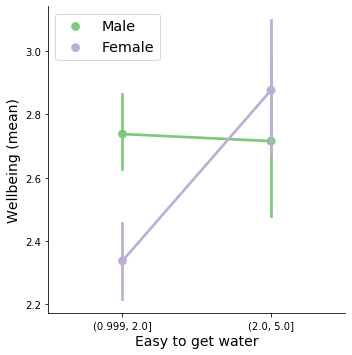

In [597]:
dfplot["gender"] = dfplot["female"].replace({0:'Male',1:'Female'})
g = sns.catplot(x='hard_get_water', 
            y="wellbeing_score", hue="gender", kind="point", data=dfplot,
           palette = "Accent",
               legend='False')
plt.ylabel("Wellbeing (mean)", fontsize=14)
plt.xlabel("Easy to get water", fontsize=14)
plt.legend(fontsize='x-large', title_fontsize='40')
g._legend.remove()

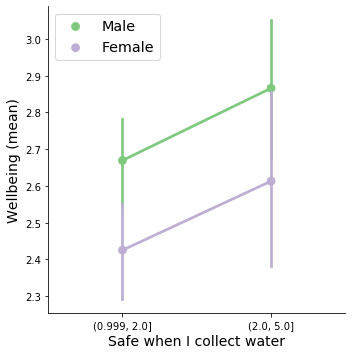

In [598]:
dfplot["gender"] = dfplot["female"].replace({0:'Male',1:'Female'})
g = sns.catplot(x='safe_get_water', 
            y="wellbeing_score", hue="gender", kind="point", data=dfplot,
           palette = "Accent",
               legend='False')
plt.ylabel("Wellbeing (mean)", fontsize=14)
plt.xlabel("Safe when I collect water", fontsize=14)
plt.legend(fontsize='x-large', title_fontsize='40')
g._legend.remove()

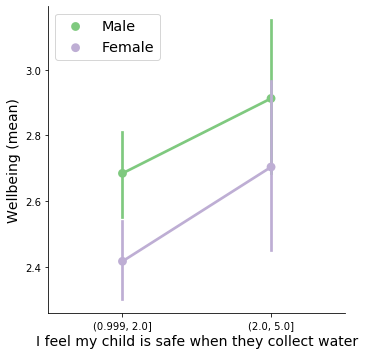

In [599]:
dfplot["gender"] = dfplot["female"].replace({0:'Male',1:'Female'})
g = sns.catplot(x='child_safe_get_water', 
            y="wellbeing_score", hue="gender", kind="point", data=dfplot,
           palette = "Accent",
               legend='False')
plt.ylabel("Wellbeing (mean)", fontsize=14)
plt.xlabel("I feel my child is safe when they collect water", fontsize=14)
plt.legend(fontsize='x-large', title_fontsize='40')
g._legend.remove()

# 2. PREPARATION FOR MODELLING
* Regression will be used to examine the unique predictors of wellbeing in this sample
* Prior to regression I will examine the distributions of the continuous predictors (i.e., the wellbeing factors) to see if these are normally distributed, and examine whether the relationships between each wellbeing factor and wellbeing is linear

## Assessing Assumptions of Regression
* The key assumptions that ensure a linear regression model is an appropriate fit to the data, and can be used for prediction of wellbeing for future data are:
    * Linear relationships between the residuals and each variable
    * Homogeneity of variance of the residuals at each value of each predictor
    * Normal distribution of the residuals
* Examining the distributions of each predictor and ensuring normality of each factor, and examining scatterplots between the outcome variable ("wellbeing") and ensuring these relationships are approximately linear, ensures that the 3 assumptions listed above are met.
* Hence I have produced scatterplots and histograms for all the wellbeing factors, and with the wellbeing score

In [119]:
df_pairplot = df.copy()
df_pairplot["female"] = df_pairplot["female"].replace({0:"Male",1:"Female"})
df_pairplot["female"] = pd.Categorical(df_pairplot["female"])
# I will divide the dataset into batches to make the examination of plots more presentable


In [120]:


df_pairplot1 = pd.concat([df_pairplot["female"], df_pairplot["wellbeing_score"], df_pairplot.loc[:,idx['in_most_ways_my_life_is_close_to_great': 'my_life_has_meaning']]], axis=1)
df_pairplot2 = pd.concat([df_pairplot["female"], df_pairplot["wellbeing_score"], df_pairplot.loc[:,idx['i_have_things_to_hope_for': 'i_feel_afraid']]], axis=1)
df_pairplot3 = pd.concat([df_pairplot["female"], df_pairplot["wellbeing_score"], df_pairplot.loc[:,idx['i_can_provide_my_child_children_with_a_good_future': 'i_have_a_job']]], axis=1)
df_pairplot4 = pd.concat([df_pairplot["female"], df_pairplot["wellbeing_score"], df_pairplot.loc[:,idx['i_get_to_spend_time_with_people_i_care_about': 'the_food_i_eat_gives_me_an_upset_stomach']]], axis=1)
df_pairplot5 = pd.concat([df_pairplot["female"], df_pairplot["wellbeing_score"], df_pairplot.loc[:,idx['i_have_time_to_tend_to_my_farm_and_grow_my_own_food': 'i_have_enough_money_to_live_comfortably']]], axis=1)



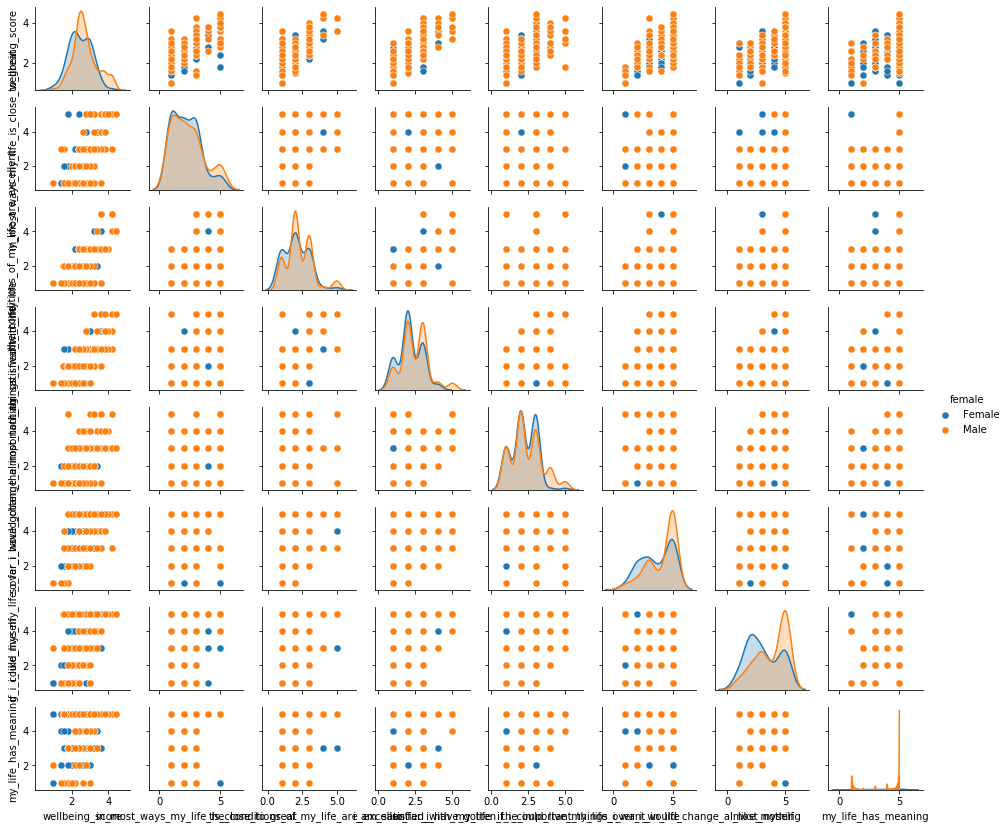

In [121]:
sns.pairplot(data = df_pairplot1, hue = "female", size = 1.8,
            plot_kws=dict(s=50, edgecolor="white", linewidth=0.5))

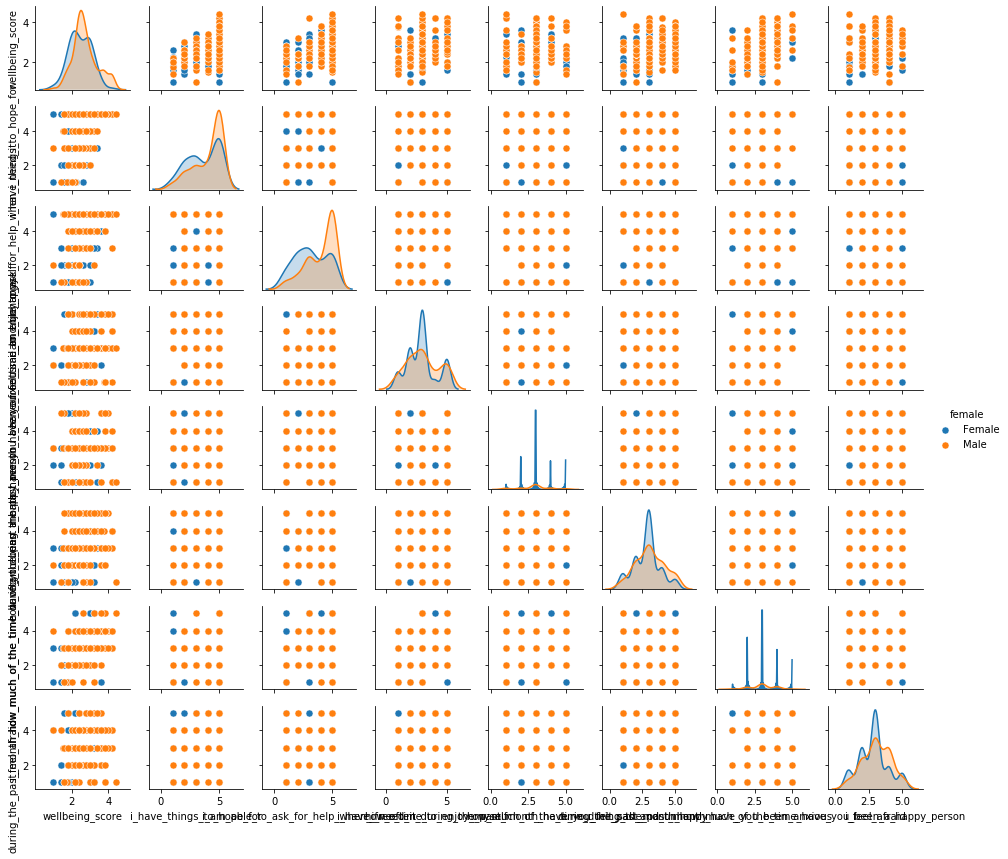

In [122]:
sns.pairplot(data = df_pairplot2, hue = "female", size = 1.8,
            plot_kws=dict(s=50, edgecolor="white", linewidth=0.5))

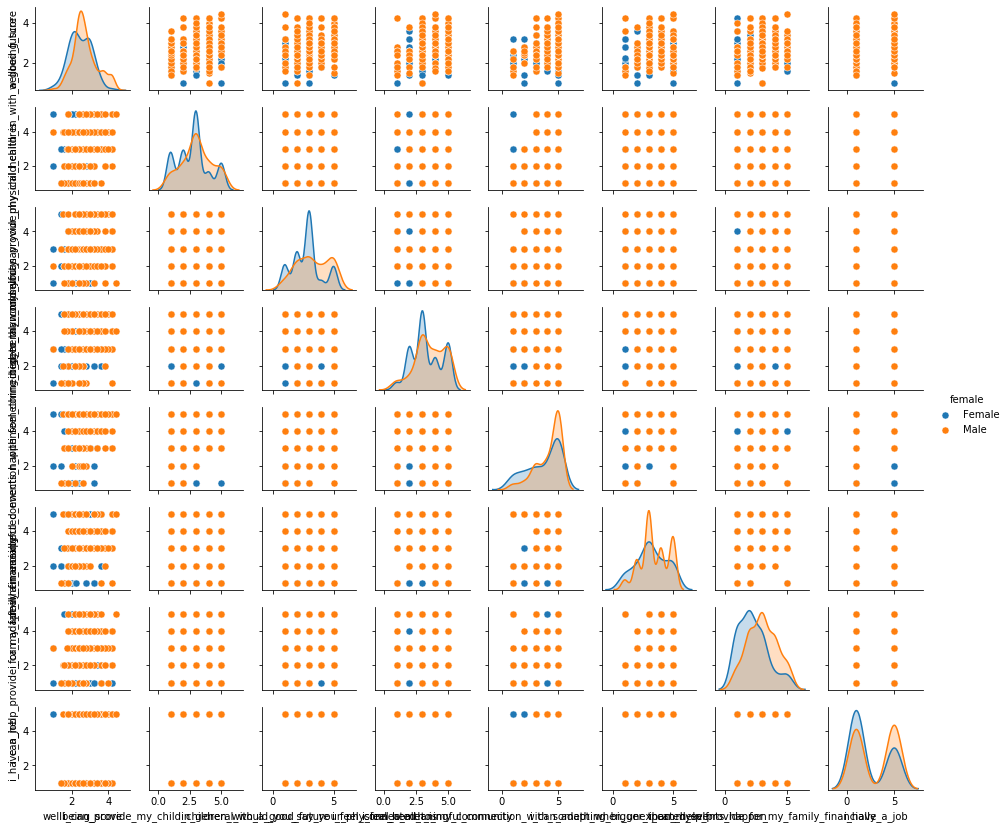

In [123]:
sns.pairplot(data = df_pairplot3, hue = "female", size = 1.8,
            plot_kws=dict(s=50, edgecolor="white", linewidth=0.5))

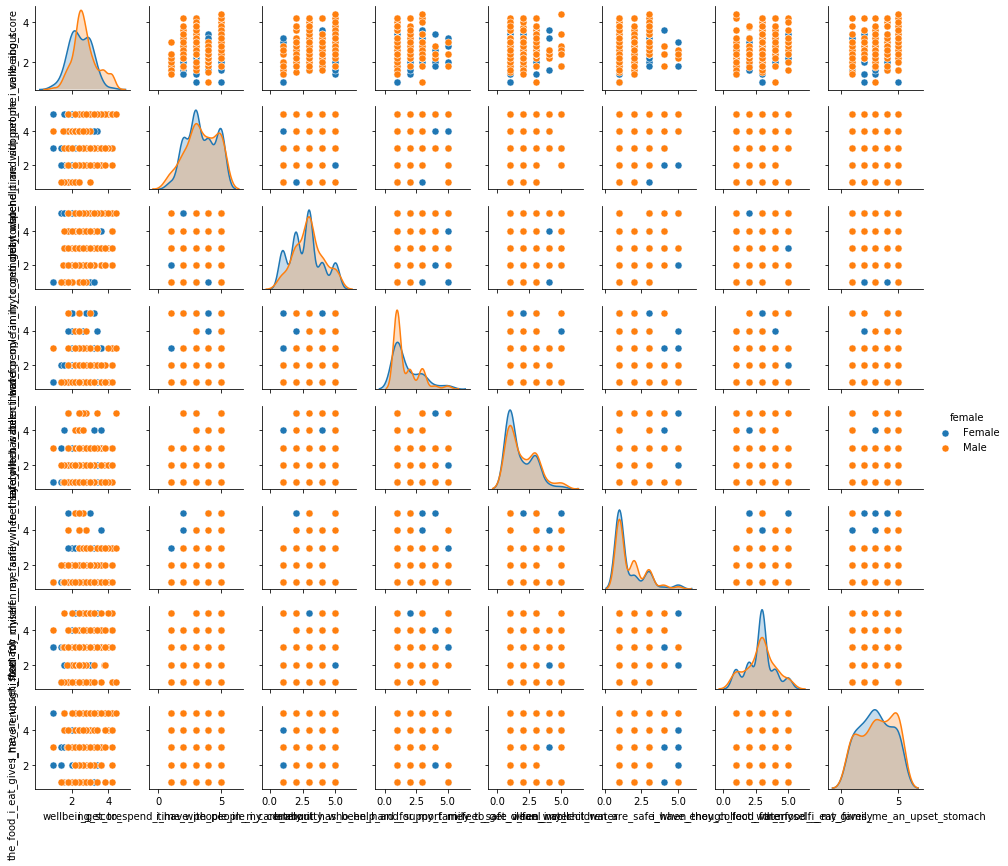

In [124]:
sns.pairplot(data = df_pairplot4, hue = "female", size = 1.8,
            plot_kws=dict(s=50, edgecolor="white", linewidth=0.5))

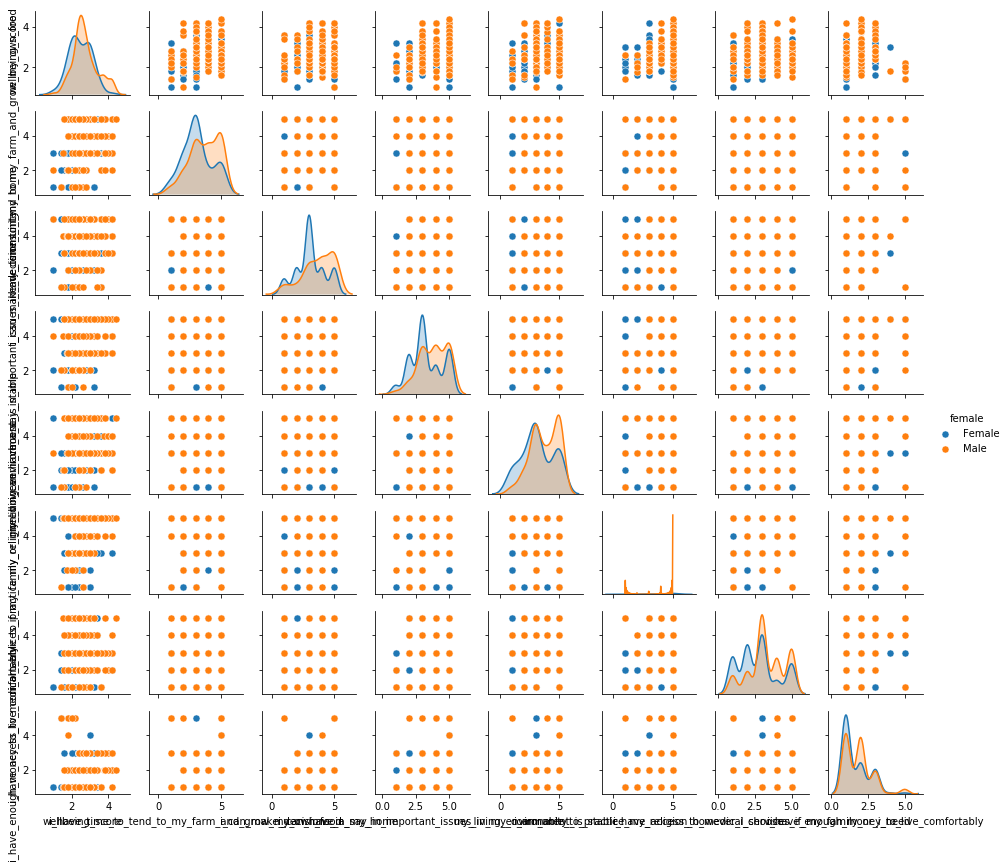

In [125]:
sns.pairplot(data = df_pairplot5, hue = "female", size = 1.8,
            plot_kws=dict(s=50, edgecolor="white", linewidth=0.5))

In [131]:
list(df.columns)

['group_number',
 'use_w4a_well',
 'female',
 'disability',
 'age',
 'relationship_status',
 'access_to_water',
 'who_collects_the_water_in_my_family',
 'wellbeing_score',
 'in_most_ways_my_life_is_close_to_great',
 'the_conditions_of_my_life_are_excellent',
 'i_am_satisfied_with_my_life',
 'so_far_i_have_gotten_the_important_things_i_want_in_life',
 'if_i_could_live_my_life_over_i_would_change_almost_nothing',
 'i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_often_during_the_past_month_have_you_felt_sad_and_unhappy',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_feel_afraid',
 'i_can_provide_my_child_children_with_a_good_future',
 'in_general_would_you_say_your_physical_health_is',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_th

### Summary of exploratory analysis
* Examining the first row in each of the 5 plots above - we can see that wellbeing (on the Y-axis) has an approximate linear relationship with each of the wellbeing factors
* The distributions of most factors is approximately normal - although some items display skew, but this does not appear to be very large - so the decision is made to keep the factors in their current scale (i.e., no transformation is applied to the factors)

## Imputation of Missing Data

* There are some values missing for a few factors, so I will use multiple imputation to impute missing values; 
* This is the most state-of-the-art approach for handling missing data that uses all available information to estimate missing values

In [144]:
# Before regression I will impute missing data using multiple imputation

df_impute = df.copy()
df_impute = df_impute.drop(['age','relationship_status','widowed','access_to_water','who_collects_the_water_in_my_family','water_access_above1km'], axis = 1)


In [152]:
# Turn group into dummy
df_impute = pd.get_dummies(data = df_impute, columns = ["group_number"])
df_impute.head()

,use_w4a_well,female,disability,wellbeing_score,in_most_ways_my_life_is_close_to_great,the_conditions_of_my_life_are_excellent,i_am_satisfied_with_my_life,so_far_i_have_gotten_the_important_things_i_want_in_life,if_i_could_live_my_life_over_i_would_change_almost_nothing,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_often_during_the_past_month_have_you_felt_sad_and_unhappy,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_feel_afraid,i_can_provide_my_child_children_with_a_good_future,in_general_would_you_say_your_physical_health_is,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_can_adapt_when_unexpected_events_happen,i_can_help_provide_for_my_family_financially,i_have_a_job,i_get_to_spend_time_with_people_i_care_about,i_have_people_in_my_community_who_help_and_support_me,lately_it_has_been_hard_for_my_family_to_get_clean_water,i_feel_safe_when_i_collect_water,i_feel_my_children_are_safe_when_they_collect_water,i_have_enough_food_for_myself__my_family,the_food_i_eat_gives_me_an_upset_stomach,i_have_time_to_tend_to_my_farm_and_grow_my_own_food,i_can_make_decisions_in_my_home,i_can_have_a_say_in_important_issues_in_my_community,my_living_environment_is_stable,i_am_able_to_practice_my_religion_however_i_choose,i_have_access_to_medical_services_if_my_family_or_i_need,i_have_enough_money_to_live_comfortably,age_continuous,relationship_status_married,relationship_status_single,relationship_status_widowed,access_to_water_1km-5km,access_to_water_500m-1km,access_to_water_5km-10km,access_to_water_<500m,access_to_water_>10km,group_number_1,group_number_2,group_number_3,group_number_4,group_number_5
Response ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,0.0,0,0.0,2.2,2.0,2.0,2.0,2.0,3.0,1,1,1,5.0,4,4,3,3.0,3,4.0,4.0,3.0,4.0,5.0,4,5.0,5,4.0,4.0,3.0,2.0,1.0,5.0,5,5.0,4,4,4.0,5.0,5.0,33.0,1,0,0,0.0,1.0,0.0,0.0,0,1,0,0,0,0
103,0.0,1,0.0,2.2,1.0,2.0,2.0,1.0,5.0,1,5,5,5.0,2,5,5,3.0,5,5.0,5.0,5.0,4.0,4.0,5,5.0,4,2.0,2.0,1.0,1.0,4.0,5.0,5,3.0,3,5,5.0,5.0,1.0,33.0,0,1,0,1.0,0.0,0.0,0.0,0,1,0,0,0,0
104,0.0,1,0.0,2.0,2.0,2.0,2.0,2.0,2.0,4,5,3,4.0,1,1,1,3.0,3,3.0,3.0,4.0,5.0,3.0,2,5.0,5,5.0,5.0,3.0,3.0,5.0,5.0,5,4.0,5,3,5.0,5.0,3.0,23.0,1,0,0,0.0,0.0,0.0,1.0,0,1,0,0,0,0
105,0.0,0,0.0,2.6,1.0,2.0,2.0,3.0,5.0,5,5,5,5.0,5,2,3,2.0,2,3.0,3.0,2.0,5.0,3.0,2,5.0,3,3.0,1.0,1.0,3.0,3.0,3.0,1,3.0,1,3,4.0,2.0,3.0,28.0,1,0,0,1.0,0.0,0.0,0.0,0,1,0,0,0,0
106,0.0,1,0.0,3.6,4.0,4.0,4.0,3.0,3.0,3,5,5,4.0,2,2,4,3.0,2,4.0,3.0,2.0,5.0,3.0,2,1.0,3,3.0,3.0,1.0,3.0,3.0,2.0,3,1.0,3,5,3.0,1.0,1.0,45.5,1,0,0,1.0,0.0,0.0,0.0,0,1,0,0,0,0


In [153]:
# Activate imputer packages
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Set up imputer function

def create_imputations(dataset, n_imputations, minimum, maximum, index_array):
    
    imputed_datasets = []
    
    for i in np.arange(1,n_imputations+1):
        
        imputer = IterativeImputer(initial_strategy='most_frequent', 
                                   max_iter=100,
                                   min_value = minimum,
                                   max_value = maximum,
                                   missing_values=np.nan,
                                   random_state=i)
        imputed_dataset = imputer.fit_transform(dataset)
        imputed_datasets.append(imputed_dataset)
    
    summed_imputations = sum(imputed_datasets)/n_imputations
    
    imputed_df = pd.DataFrame(summed_imputations, columns = list(dataset.columns), index = index_array)
    
    return imputed_df
        
# Apply function for imputation (binary columns)

df_imputed = create_imputations(dataset = df_impute, n_imputations = 30, minimum = 1, maximum = 5, index_array = list(df_impute.index))



In [154]:
# Return "Wellbeing" column back to this dataset
# Return "Group" back into the dataset

df_imputed['group'] = df['group_number']

# View the imputed dataset

display(df_imputed.head(10))

,use_w4a_well,female,disability,wellbeing_score,in_most_ways_my_life_is_close_to_great,the_conditions_of_my_life_are_excellent,i_am_satisfied_with_my_life,so_far_i_have_gotten_the_important_things_i_want_in_life,if_i_could_live_my_life_over_i_would_change_almost_nothing,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_often_during_the_past_month_have_you_felt_sad_and_unhappy,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_feel_afraid,i_can_provide_my_child_children_with_a_good_future,in_general_would_you_say_your_physical_health_is,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_can_adapt_when_unexpected_events_happen,i_can_help_provide_for_my_family_financially,i_have_a_job,i_get_to_spend_time_with_people_i_care_about,i_have_people_in_my_community_who_help_and_support_me,lately_it_has_been_hard_for_my_family_to_get_clean_water,i_feel_safe_when_i_collect_water,i_feel_my_children_are_safe_when_they_collect_water,i_have_enough_food_for_myself__my_family,the_food_i_eat_gives_me_an_upset_stomach,i_have_time_to_tend_to_my_farm_and_grow_my_own_food,i_can_make_decisions_in_my_home,i_can_have_a_say_in_important_issues_in_my_community,my_living_environment_is_stable,i_am_able_to_practice_my_religion_however_i_choose,i_have_access_to_medical_services_if_my_family_or_i_need,i_have_enough_money_to_live_comfortably,age_continuous,relationship_status_married,relationship_status_single,relationship_status_widowed,access_to_water_1km-5km,access_to_water_500m-1km,access_to_water_5km-10km,access_to_water_<500m,access_to_water_>10km,group_number_1,group_number_2,group_number_3,group_number_4,group_number_5,group
102,0.0,0.0,0.0,2.2,2.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,2.0,1.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,33.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
103,0.0,1.0,0.0,2.2,1.0,2.0,2.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,2.0,2.0,1.0,1.0,4.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,1.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
104,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,3.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
105,0.0,0.0,0.0,2.6,1.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,5.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
106,0.0,1.0,0.0,3.6,4.0,4.0,4.0,3.0,3.0,3.0,5.0,5.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,5.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,3.0,5.0,3.0,1.0,1.0,45.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
107,0.0,0.0,0.0,2.4,2.0,2.0,3.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
108,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,5.0,2.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
109,0.0,0.0,0.0,2.6,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,2.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,2.0,2.0,1.0,1.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
110,0.0,0.0,0.0,2.6,3.0,3.0,3.0,2.0,2.0,2.0,5.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,3.0,55.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
111,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,4.0,2.0,5.0,3.0,1.0,1.0,38.0,1.0,0.0,0.0

In [155]:
list(df_imputed.columns)

['use_w4a_well',
 'female',
 'disability',
 'wellbeing_score',
 'in_most_ways_my_life_is_close_to_great',
 'the_conditions_of_my_life_are_excellent',
 'i_am_satisfied_with_my_life',
 'so_far_i_have_gotten_the_important_things_i_want_in_life',
 'if_i_could_live_my_life_over_i_would_change_almost_nothing',
 'i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_often_during_the_past_month_have_you_felt_sad_and_unhappy',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_feel_afraid',
 'i_can_provide_my_child_children_with_a_good_future',
 'in_general_would_you_say_your_physical_health_is',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_than_myself',
 'i_can_adapt_when_unexpected_events_happen',
 'i_can_help_provide_for_my_family_financially',
 '

In [158]:
# For modelling, we will only retain the 

cols_to_keep = [
    'use_w4a_well',
 'female',
 'disability',
 'wellbeing_score',
#  'in_most_ways_my_life_is_close_to_great',
#  'the_conditions_of_my_life_are_excellent',
#  'i_am_satisfied_with_my_life',
#  'so_far_i_have_gotten_the_important_things_i_want_in_life',
#  'if_i_could_live_my_life_over_i_would_change_almost_nothing',
 'i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_often_during_the_past_month_have_you_felt_sad_and_unhappy',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_feel_afraid',
 'i_can_provide_my_child_children_with_a_good_future',
 'in_general_would_you_say_your_physical_health_is',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_than_myself',
 'i_can_adapt_when_unexpected_events_happen',
 'i_can_help_provide_for_my_family_financially',
 'i_have_a_job',
 'i_get_to_spend_time_with_people_i_care_about',
 'i_have_people_in_my_community_who_help_and_support_me',
 'lately_it_has_been_hard_for_my_family_to_get_clean_water',
 'i_feel_safe_when_i_collect_water',
 'i_feel_my_children_are_safe_when_they_collect_water',
 'i_have_enough_food_for_myself__my_family',
 'the_food_i_eat_gives_me_an_upset_stomach',
 'i_have_time_to_tend_to_my_farm_and_grow_my_own_food',
 'i_can_make_decisions_in_my_home',
 'i_can_have_a_say_in_important_issues_in_my_community',
 'my_living_environment_is_stable',
 'i_am_able_to_practice_my_religion_however_i_choose',
 'i_have_access_to_medical_services_if_my_family_or_i_need',
 'i_have_enough_money_to_live_comfortably',
 'age_continuous',
#  'relationship_status_married',
 'relationship_status_single',
 'relationship_status_widowed',
 'access_to_water_1km-5km',
 'access_to_water_500m-1km',
 'access_to_water_5km-10km',
 'access_to_water_<500m',
#  'access_to_water_>10km',
#  'group_number_1',
#  'group_number_2',
#  'group_number_3',
#  'group_number_4',
#  'group_number_5',
 'group'
    ]

# now create the subsetted dataset 

df_reg = df_imputed[cols_to_keep]

#### Inclusion of interaction terms
* I will include interactions between gender and water-related factors
* This will allow us to determine if the relationship between water-access and wellbeing is moderated by gender

In [160]:
df_reg["female*hard_get_water"] = df_reg["female"]*df_reg["lately_it_has_been_hard_for_my_family_to_get_clean_water"]
df_reg["female*safe_get_water"] = df_reg["female"]*df_reg["i_feel_safe_when_i_collect_water"]
df_reg["female*child_safe_get_water"] = df_reg["female"]*df_reg["i_feel_my_children_are_safe_when_they_collect_water"]
df_reg["female*1-5km"] = df_reg["female"]*df_reg["access_to_water_1km-5km"]
df_reg["female*500m-1km"] = df_reg["female"]*df_reg["access_to_water_500m-1km"]
df_reg["female*5km-10km"] = df_reg["female"]*df_reg["access_to_water_5km-10km"]
df_reg["female*<500m"] = df_reg["female"]*df_reg["access_to_water_<500m"]

In [161]:
df_reg.isna().sum()

use_w4a_well                                                               0
female                                                                     0
disability                                                                 0
wellbeing_score                                                            0
i_like_myself                                                              0
my_life_has_meaning                                                        0
i_have_things_to_hope_for                                                  0
i_am_able_to_ask_for_help_when_i_need_it                                   0
i_have_free_time_to_enjoy_myself                                           0
how_often_during_the_past_month_have_you_felt_sad_and_unhappy              0
how_much_of_the_time_during_the_past_month_have_you_been_anxious           0
during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person    0
i_feel_afraid                                                              0

## Feature Selection
* Given that we have over 300 predictors in the model, we will first cull many of these features using univariate feature selection
* I will retain only those features that are statistically significant (based on univariate feature selection)

In [661]:
# Univariate Feature Selection with Boot strap resampling
import statsmodels.api as sm
from sklearn.feature_selection import SelectFpr
from statsmodels.tools import add_constant
from sklearn.utils import resample

# fpr = SelectFpr(OLS_get_coef_p, alpha = 0.05)
# fpr.fit_transform(X, y)

def OLS_get_coef_p(X_array, y_array):
    n_features = X_array.shape[1]
    coef_array = np.empty(n_features)
    p_array = np.empty(n_features)
    for i in range(n_features):
        exog = X_array[:,i]
        endog = y_array
        model = sm.OLS(endog, add_constant(exog), missing = "drop")
        results = model.fit()
        coef = results.params[1]
        p = results.pvalues[1]
        coef_array[i] = coef
        p_array[i] = p
    results_tuple = tuple([coef_array, p_array])
    return results_tuple


def bootstrapped_feature_selection_univariate_ols(dataset,n_datasets,proportion,dv,alpha,portion):
    
    bootstrapped_dfs = []
    i = 1
    while i <= n_datasets:
        resampled_df = resample(dataset, replace = True, n_samples = int(proportion*dataset.shape[0]))
        bootstrapped_dfs.append(resampled_df)
        i = i + 1
        
    supports_dfs = []
    fpr = SelectFpr(OLS_get_coef_p, alpha=alpha)
    for df in bootstrapped_dfs:
        X = df.drop(dv, axis=1)
        y = df[dv]
        fpr.fit_transform(X, y)
        supports = fpr.get_support()
        df = pd.DataFrame(supports)
        df = df.transpose()
        df.columns = list(X.columns)
        supports_dfs.append(df)
    final_df = pd.concat(supports_dfs)
    final_df = final_df.transpose()
    final_df["sum"] = final_df.apply(np.sum, axis=1)
    final_df = final_df.loc[final_df["sum"] > (portion*n_datasets), :]  #### HERE - I KEEP predictors if sig in 30% of bootstraps
    return list(final_df.index)

# Apply the function using mentors_subset_nona dataset (no_na)

feature_selected_columns = bootstrapped_feature_selection_univariate_ols(dataset = df_reg,
                                                                         n_datasets = 100,
                                                                         proportion = 0.66,
                                                                         dv = "wellbeing_score",
                                                                         alpha = 0.05,
                                                                         portion = 0.8)



In [662]:
feature_selected_columns

['i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_can_provide_my_child_children_with_a_good_future',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_than_myself',
 'i_have_people_in_my_community_who_help_and_support_me',
 'i_have_enough_food_for_myself__my_family',
 'relationship_status_widowed']

In [668]:
# Subset the dataset to retain only these significant columns
df_imputed_feature_selected = df_imputed[feature_selected_columns]

# Return "wellbeing" to the dataset
df_imputed_feature_selected['wellbeing'] = df_reg['wellbeing_score']
# Return group to the dataset
df_imputed_feature_selected['group'] = df_reg['group']
# Return child safe to the dataset
# df_imputed_feature_selected['child_safe_water'] = df_reg['i_feel_my_children_are_safe_when_they_collect_water']
# df_imputed_feature_selected['female*child_safe_get_water'] = df_reg['female*child_safe_get_water']
# df_imputed_feature_selected['1km-5km'] = df_reg['access_to_water_1km-5km']
# df_imputed_feature_selected['<500m'] = df_reg['access_to_water_<500m']
# df_imputed_feature_selected["female*<500m"] = df_reg["female*<500m"]

## Regression (GEE) with Regularization
* I will use regression with regularization to analyse the data to identify the factors uniquely related to wellbeing
* Regularisation causes the coefficients of some predictors to decrease to 0, and so these predictors are eliminated from the model. These factors could be regarded as not important for predicting wellbeing.
* Furthermore, regularisation helps to simplify the model and inferences regarding factors related to wellbeing can be more meaningfully extracted

### Use Train and Test Splits for GEE Regularisation

In [669]:
from sklearn.model_selection import train_test_split

X = df_imputed_feature_selected.drop(['wellbeing'], axis=1)
y = df_imputed_feature_selected['wellbeing']
X['group'] = df_imputed_feature_selected['group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

### Lasso Linear Regression - Cross Validation
* In the code below, I use cross validation to determine how much regularisation to input into the model
* Regularisation will handle a multitude of problems with the dataset, including multicollinearity. It will ensure that we find the optimal amount of regularisation so as to predict the maximal variation in wellbeing for future cohorts

In [670]:
# Cross validation

# Prepare the datasets
X = df_imputed_feature_selected.drop(['wellbeing'], axis=1)
X = pd.get_dummies(data = X, columns=['group'], drop_first=True)
X['const'] = 1
y = df_imputed_feature_selected['wellbeing']

# I will use cross validation to identify how much regularisaton we should use

from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lasso = Lasso()

param_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 1]}

lasso_grid = GridSearchCV(lasso, param_grid, cv=10)

lasso_grid_results = lasso_grid.fit(X, y)

display(lasso_grid_results.best_score_)
display(lasso_grid_results.best_params_)

# The Best Regularization parameter is alpha = 0.05

0.1488222908702829

{'alpha': 0.005}

In [671]:
df_imputed_feature_selected

,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_have_people_in_my_community_who_help_and_support_me,i_have_enough_food_for_myself__my_family,relationship_status_widowed,wellbeing,group
102,1.0,1.0,1.0,5.000000,4.0,3.0,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000,0.0,2.20,1
103,1.0,5.0,5.0,5.000000,2.0,5.0,3.000000,5.000000,5.000000,4.000000,2.000000,4.000000,0.0,2.20,1
104,4.0,5.0,3.0,4.000000,1.0,1.0,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,0.0,2.00,1
105,5.0,5.0,5.0,5.000000,5.0,3.0,2.000000,3.000000,2.000000,5.000000,3.000000,3.000000,0.0,2.60,1
106,3.0,5.0,5.0,4.000000,2.0,4.0,3.000000,4.000000,2.000000,5.000000,3.000000,3.000000,0.0,3.60,1
107,3.0,5.0,5.0,5.000000,2.0,2.0,2.000000,3.000000,2.000000,5.000000,1.000000,3.000000,0.0,2.40,1
108,2.0,2.0,5.0,2.000000,3.0,2.0,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000,0.0,2.00,1
109,5.0,5.0,5.0,4.000000,4.0,1.0,2.000000,3.000000,4.000000,5.000000,2.000000,3.000000,0.0,2.60,1
110,2.0,5.0,4.0,3.000000,3.0,4.0,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,0.0,2.60,1
111,5.0,5.0,5.0,5.000000,2.0,4.0,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,0.0,2.00,1


### Run Final Lasso Regression Model
* Results above indicated an alpha of 0.005 was the optimal value for regularisation

In [683]:
# Must first fit the original OLS model without values for alpha
ols = sm.OLS(y, add_constant(X))
ols.fit()

# Now can add regularisation - I am using lasso regression - so L1_w1 (lasso - weight = 1) means lasso, with alpha 0.1
results_fr = ols.fit_regularized(method = 'elastic_net', L1_wt = 1, alpha = 0.005)

final = sm.regression.linear_model.OLSResults(ols, results_fr.params, ols.normalized_cov_params)
display(final.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wellbeing   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     9.914
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.77e-20
Time:                        20:18:44   Log-Likelihood:                -195.51
No. Observations:                 266   AIC:                             427.0
Df Residuals:                     248   BIC:                             491.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
i_like_myself                                                               0.1005      0.032      3.103      0.002       0.037       0.164
my_life_has_meaning                                                        -0.0018      0.036     -0.050      0.960      -0.073       0.069
i_have_things_to_hope_for                                                   0.1277      0.033      3.896      0.000       0.063       0.192
i_am_able_to_ask_for_help_when_i_need_it                                    0.0766      0.033      2.299      0.022       0.011       0.142
i_have_free_time_to_enjoy_myself                                            0.0872      0.030      2.870      0.004       0.027       0.147
how_much_of_the_time_during_the_past_month_have_you_been_anxious            0.1404      0.034      4.094      0.000       0.073       0.208
during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person     0.1248      0.042      2.951      0.003       0.042       0.208
i_can_provide_my_child_children_with_a_good_future                          0.0242      0.030      0.819      0.413      -0.034       0.083
i_feel_connected_to_my_community                                                 0      0.034          0      1.000      -0.067       0.067
i_feel_a_meaningful_connection_with_something_bigger_than_myself            0.0578      0.029      1.984      0.048       0.000       0.115
i_have_people_in_my_community_who_help_and_support_me                       0.0154      0.032      0.485      0.628      -0.047       0.078
i_have_enough_food_for_myself__my_family                                    0.0129      0.033      0.386      0.700      -0.053       0.079
relationship_status_widowed                                                -0.2087      0.096     -2.165      0.031      -0.398      -0.019
group_2                                                                          0      0.108          0      1.000      -0.212       0.212
group_3                                                                     0.1175      0.118      0.993      0.322      -0.116       0.351
group_4                                                                     0.2251      0.107      2.100      0.037       0.014       0.436
group_5                                                                          0      0.187          0      1.000      -0.368       0.368
const                                                                            0      0.218          0      1.000      -0.429       0.429
==============================================================================
Omnibus:                        1.142   Durbin-Watson:          

In [620]:
[str(col).replace("_"," ") for col in final_results_sig.index]

['coef', 'p']

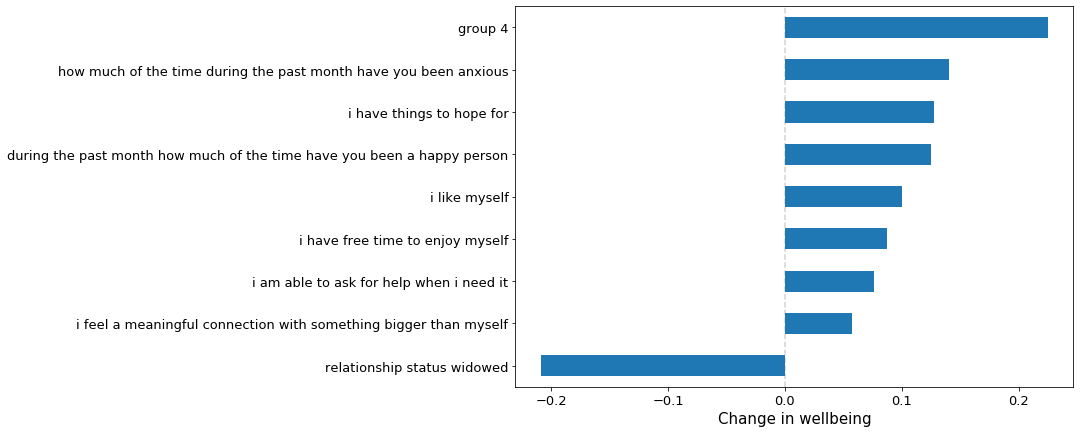

In [682]:
final_results = pd.DataFrame(final.params, columns = ["coef"])
final_results['p'] = final.pvalues
final_results_sig = final_results.loc[final_results.p < 0.05]
final_results_sig = final_results_sig.sort_values(by = "coef")

fig, ax = plt.subplots(1,1, figsize = (10,7))
ax.grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'x')
final_results_sig["coef"].plot(kind="barh", ax = ax, zorder=3)
ax.set_yticklabels([str(col).replace("_"," ") for col in final_results_sig.index])
ax.set_xlabel("Change in wellbeing", fontsize = 15)
ax.axvline(x = 0, linestyle = '--', color="lightgray")
ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.show()

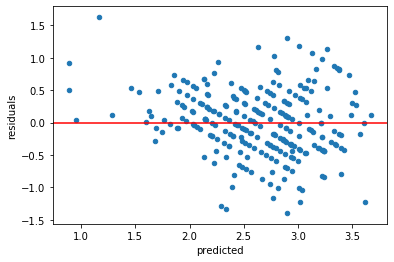

In [675]:
preds = final.predict()
residuals = final.resid

pred_res = pd.DataFrame({"predicted":preds, "residuals":residuals})
pred_res.plot(kind = "scatter", x = "predicted", y = "residuals")
plt.axhline(y=0, color='r', linestyle='-')

# the plot below indicates there may be some heteroscedasticity in the data
# One solution is to transform the dependent variable

### Plot the relationships between factors and wellbeing


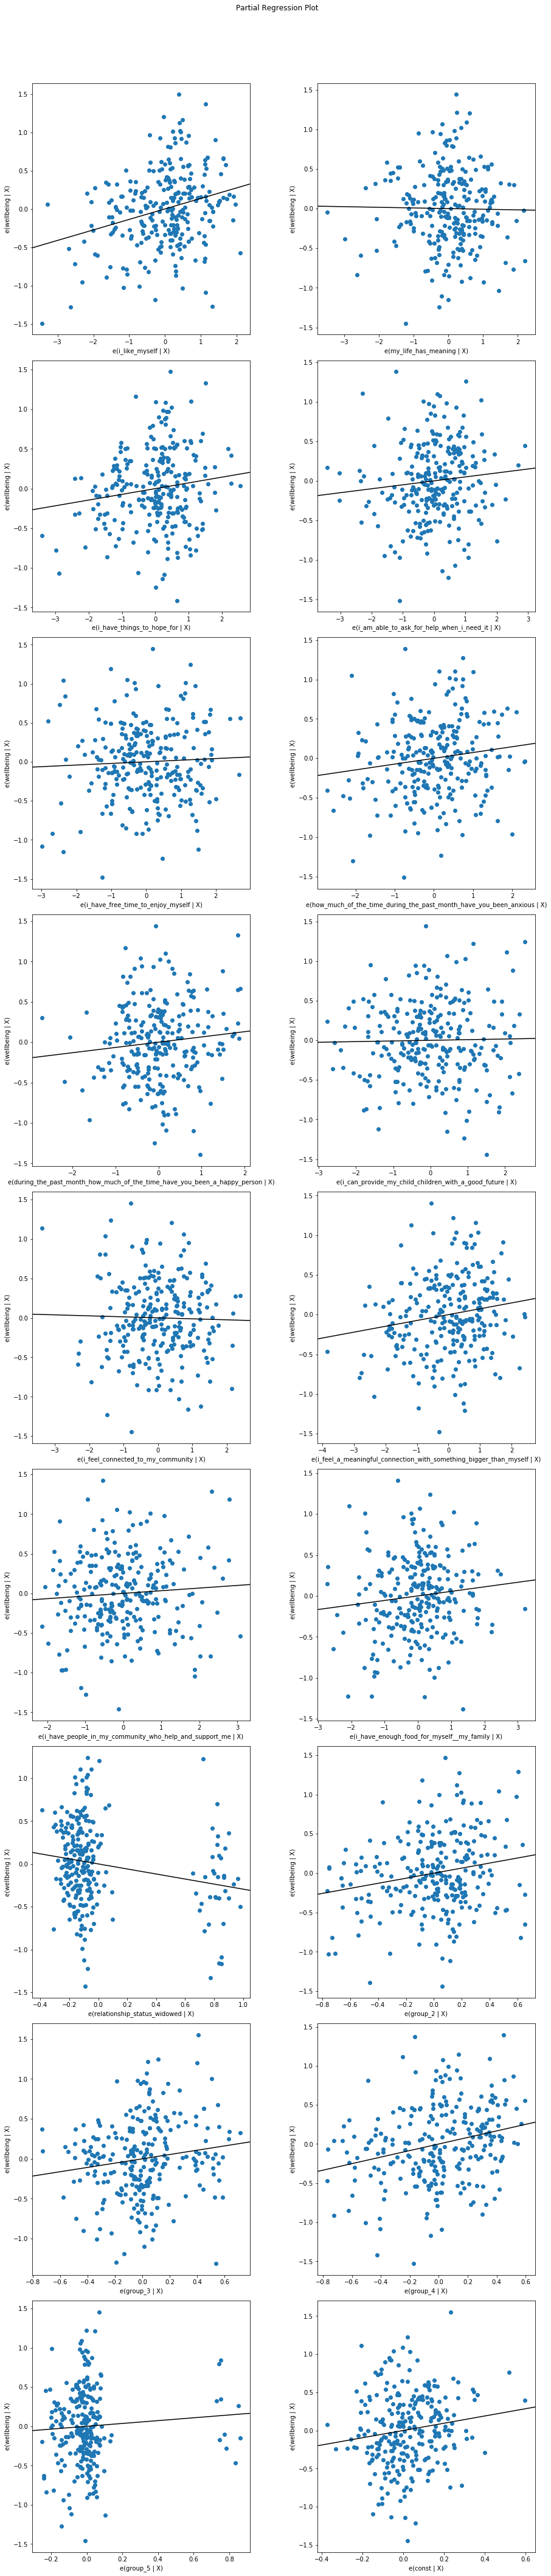

In [684]:
fig = plt.figure(figsize=(13,60))
fig = sm.graphics.plot_partregress_grid(results_fr, fig=fig)

# Cluster analysis

* I will next examine whether there are distinct clusters in the dataset, with differing wellbeing needs
* I will use the feature selected set of predictors for this analysis
* I will examine the fit of the cluster solution (are the clusters distinct from each other, and within each cluster, is there a high degree of similarity among members)?
* I am going to use **birch clustering** to perform the cluster analysis

In [685]:
# This is the dataset we will use
df_imputed_feature_selected.head()

,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_have_people_in_my_community_who_help_and_support_me,i_have_enough_food_for_myself__my_family,relationship_status_widowed,wellbeing,group
102,1.0,1.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,0.0,2.2,1
103,1.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,5.0,4.0,2.0,4.0,0.0,2.2,1
104,4.0,5.0,3.0,4.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,5.0,0.0,2.0,1
105,5.0,5.0,5.0,5.0,5.0,3.0,2.0,3.0,2.0,5.0,3.0,3.0,0.0,2.6,1
106,3.0,5.0,5.0,4.0,2.0,4.0,3.0,4.0,2.0,5.0,3.0,3.0,0.0,3.6,1


In [686]:
from sklearn.preprocessing import MinMaxScaler

# Set up the dataset - remove "wellbeing"
df_cluster = df_imputed_feature_selected.copy()
df_cluster = df_cluster.drop(["wellbeing"], axis=1)
df_cluster = pd.get_dummies(data = df_cluster, columns = ["group"], drop_first=True)

# If clustering, we need to ensure all variables are in the same scale

minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(df_cluster)

# Turn the array into a dataframe

df_cluster_scaled = pd.DataFrame(scaled_data, columns = df_cluster.columns, index = df_cluster.index)
df_cluster_scaled.head()


,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_have_people_in_my_community_who_help_and_support_me,i_have_enough_food_for_myself__my_family,relationship_status_widowed,group_2,group_3,group_4,group_5
102,0.00,0.0,0.0,1.00,0.75,0.50,0.50,0.75,0.50,0.75,0.75,0.00,0.0,0.0,0.0,0.0,0.0
103,0.00,1.0,1.0,1.00,0.25,1.00,0.50,1.00,1.00,0.75,0.25,0.75,0.0,0.0,0.0,0.0,0.0
104,0.75,1.0,0.5,0.75,0.00,0.00,0.50,0.50,0.75,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0
105,1.00,1.0,1.0,1.00,1.00,0.50,0.25,0.50,0.25,1.00,0.50,0.50,0.0,0.0,0.0,0.0,0.0
106,0.50,1.0,1.0,0.75,0.25,0.75,0.50,0.75,0.25,1.00,0.50,0.50,0.0,0.0,0.0,0.0,0.0


In [687]:
# Now we can apply the clustering analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

n = len(df_cluster_scaled)

thresholds = [0.1, 0.25, 0.5, 0.75, 1, 2, 3]
branching_factors = [np.round((0.05*n), 0), np.round((0.07*n), 0), np.round((0.1*n), 0), np.round((0.12*n), 0),
                   np.round((0.15*n), 0), np.round((0.18*n), 0), np.round((0.2*n), 0)]
heights = [5,6,7,8,9,10,11,12,13,14]

combinations = list(itertools.product(thresholds, branching_factors, n_clusters))


In [688]:
len(df_cluster_scaled)

266

In [689]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

heights = [5,6,7,8,9,10,11,12]

silhouettes = []
for height in heights:
    linkage_mx = linkage(df_cluster_scaled, method='ward')
    solution = fcluster(linkage_mx, height, criterion = 'distance')
    silhouette = silhouette_score(df_cluster_scaled,
                         solution,
                         metric = 'euclidean')
    silhouettes.append(silhouette)
results_df = pd.DataFrame({"heights":heights,"silhouettes":silhouettes})
results_df

# Result suggests a height of 10 is best

,heights,silhouettes
0,5,0.196465
1,6,0.192337
2,7,0.206944
3,8,0.206944
4,9,0.211376
5,10,0.211376
6,11,0.189746
7,12,0.189746


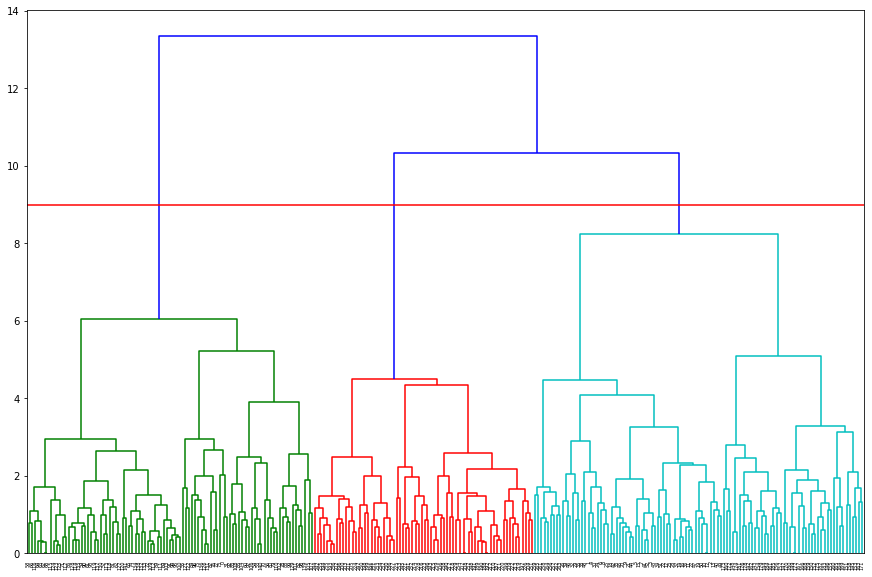

In [690]:
# Re-fit model using the height of 10

linkage_mx = linkage(df_cluster_scaled, method='ward')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize = (15,10))
dendrogram(linkage_mx)
plt.axhline(y=9, color='r', linestyle='-')

final_clusters = fcluster(linkage_mx, 9, criterion = 'distance')



* At a height of 10, the analysis extracted THREE clusters of participants
* This 3 cluster solution had the best fit to the data
* The silhouette score was low, however - indicating the evidence is weak for distinct clusters

In [691]:
df_cluster_scaled_clusters = df_cluster_scaled.copy()
df_cluster_scaled_clusters['cluster'] = final_clusters
# Turn into dummies
df_cluster_scaled_clusters = pd.get_dummies(data = df_cluster_scaled_clusters, columns = ['cluster'])
df_cluster_scaled_clusters.head()

,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,i_have_people_in_my_community_who_help_and_support_me,i_have_enough_food_for_myself__my_family,relationship_status_widowed,group_2,group_3,group_4,group_5,cluster_1,cluster_2,cluster_3
102,0.00,0.0,0.0,1.00,0.75,0.50,0.50,0.75,0.50,0.75,0.75,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0
103,0.00,1.0,1.0,1.00,0.25,1.00,0.50,1.00,1.00,0.75,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0,0,1
104,0.75,1.0,0.5,0.75,0.00,0.00,0.50,0.50,0.75,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0,0,1
105,1.00,1.0,1.0,1.00,1.00,0.50,0.25,0.50,0.25,1.00,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0,0,1
106,0.50,1.0,1.0,0.75,0.25,0.75,0.50,0.75,0.25,1.00,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0,0,1


## Examining the differences between the clusters

* First I will test whether the wellbeing differs between the clusters

In [692]:
# Must first fit the original OLS model without values for alpha
ols = sm.OLS(y, add_constant(df_cluster_scaled_clusters[['cluster_2','cluster_3']]))
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wellbeing   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     18.86
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.21e-08
Time:                        20:50:45   Log-Likelihood:                -246.65
No. Observations:                 266   AIC:                             499.3
Df Residuals:                     263   BIC:                             510.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8978      0.064     44.943      0.000       2.771       3.025
cluster_2     -0.2221      0.098     -2.271      0.024      -0.415      -0.030
cluster_3     -0.5368      0.088     -6.094      0.000      -0.710      -0.363
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.141
Skew:                           0.153   Prob(JB):                        0.565
Kurtosis:                       2.901   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [693]:
# Must first fit the original OLS model without values for alpha
ols = sm.OLS(y, add_constant(df_cluster_scaled_clusters[['cluster_1','cluster_3']]))
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wellbeing   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     18.86
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.21e-08
Time:                        20:57:01   Log-Likelihood:                -246.65
No. Observations:                 266   AIC:                             499.3
Df Residuals:                     263   BIC:                             510.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6757      0.074     36.396      0.000       2.531       2.820
cluster_1      0.2221      0.098      2.271      0.024       0.030       0.415
cluster_3     -0.3148      0.095     -3.316      0.001      -0.502      -0.128
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.141
Skew:                           0.153   Prob(JB):                        0.565
Kurtosis:                       2.901   Cond. No.                         4.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [694]:
df_cluster_scaled_clusters.head()
df_cluster_scaled_clusters.shape

(266, 20)

In [715]:
# Before running MANOVA - I will return the wellbeing column back to the dataset

df_cluster_scaled_clusters["wellbeing"] = df_imputed_feature_selected['wellbeing']

In [716]:
# Perform MANOVA 

from statsmodels.multivariate.manova import MANOVA

results = MANOVA(exog = df_cluster_scaled_clusters[['cluster_2','cluster_3']],
       endog = df_cluster_scaled_clusters.drop(['cluster_1','cluster_2','cluster_3'], axis=1)).mv_test()

results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Multivariate linear model
===========================================================================================
                                                                                           
-------------------------------------------------------------------------------------------
           x0                  Value          Num DF  Den DF         F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 18.0000 247.0000 10299899147782508.0000 0.0000
         Pillai's trace               1.0000 18.0000 247.0000 10299899147782510.0000 0.0000
 Hotelling-Lawley trace 750599937895081.6250 18.0000 247.0000 10299899147782508.0000 0.0000
    Roy's greatest root 750599937895081.6250 18.0000 247.0000 10299899147782508.0000 0.0000
-------------------------------------------------------------------------------------------
                                                                                           
------------------------------------------------------------------------------------------------
                  x1                 Value        Num DF       Den DF       F Value       Pr > F
------------------------------------------------------------------------------------------------
                 Wilks' lambda       0.0812      17.0000      248.0000      164.9956      0.0000
                Pillai's trace       0.9188      17.0000      248.0000      164.9956      0.0000
        Hotelling-Lawley trace      11.3102      17.0000      248.0000      164.9956      0.0000
           Roy's greatest root      11.3102      17.0000      248.0000      164.9956      0.0000
===========================================================================================

"""

In [717]:
ols_results.pvalues[1]

0.00040145065897582337

In [718]:
# Run separate ANOVA tests on each predictor in the model
# First - do cluster 2 and 3, versus cluster 1

ols = sm.OLS(y, add_constant(df_cluster_scaled_clusters[['cluster_1','cluster_2']]))
ols_results = ols.fit()
ols_results.summary()

dependent_variables = list(df_cluster_scaled_clusters.drop(['cluster_1','cluster_2','cluster_3'], axis=1).columns)
X = df_cluster_scaled_clusters[['cluster_2','cluster_3']]

coefs_cluster2 = []
coefs_cluster3 = []
pvalues_cluster2 = []
pvalues_cluster3 = []
for dv in dependent_variables:
    ols = sm.OLS(endog = df_cluster_scaled_clusters[dv], exog = add_constant(X))
    ols_results = ols.fit()
    pvalues_cluster2.append(ols_results.pvalues[1])
    pvalues_cluster3.append(ols_results.pvalues[2])
    coefs_cluster2.append(ols_results.params[1])
    coefs_cluster3.append(ols_results.params[2])

cluster1_ref_results = pd.DataFrame({"predictor":dependent_variables,
                                     "Cluster2 v 1":coefs_cluster2,
                                     "pvalue_clus2":pvalues_cluster2,
                                     "Cluster3 v 1":coefs_cluster3,
                                     "pvalue_clus3":pvalues_cluster3})
cluster1_ref_results.set_index("predictor", inplace=True)
np.round(cluster1_ref_results, 3)

,Cluster2 v 1,pvalue_clus2,Cluster3 v 1,pvalue_clus3
predictor,,,,
i_like_myself,-0.271,0.000,-0.303,0.000
my_life_has_meaning,-0.183,0.000,-0.086,0.041
i_have_things_to_hope_for,-0.078,0.113,-0.235,0.000
i_am_able_to_ask_for_help_when_i_need_it,-0.337,0.000,-0.225,0.000
i_have_free_time_to_enjoy_myself,-0.145,0.003,-0.200,0.000
how_much_of_the_time_during_the_past_month_have_you_been_anxious,-0.113,0.007,-0.117,0.002
during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,-0.021,0.537,-0.099,0.001
i_can_provide_my_child_children_with_a_good_future,-0.091,0.059,-0.095,0.029
i_feel_connected_to_my_community,-0.273,0.000,-0.155,0.000


In [719]:
# Run separate ANOVA tests on each predictor in the model
# First - do cluster 1 and 2, versus cluster 3

dependent_variables = list(df_cluster_scaled_clusters.drop(['cluster_1','cluster_2','cluster_3'], axis=1).columns)
X = df_cluster_scaled_clusters[['cluster_1','cluster_2']]

coefs_cluster2 = []
coefs_cluster3 = []
pvalues_cluster2 = []
pvalues_cluster3 = []
for dv in dependent_variables:
    ols = sm.OLS(endog = df_cluster_scaled_clusters[dv], exog = add_constant(X))
    ols_results = ols.fit()
    pvalues_cluster2.append(ols_results.pvalues[1])
    pvalues_cluster3.append(ols_results.pvalues[2])
    coefs_cluster2.append(ols_results.params[1])
    coefs_cluster3.append(ols_results.params[2])

cluster2_ref_results = pd.DataFrame({"predictor":dependent_variables,
                                     "Cluster1 v 3":coefs_cluster2,
                                     "pvalue_clus1":pvalues_cluster2,
                                     "Cluster2 v 3":coefs_cluster3,
                                     "pvalue_clus2_3":pvalues_cluster3})
cluster2_ref_results.set_index("predictor", inplace=True)
np.round(cluster2_ref_results, 3)

,Cluster1 v 3,pvalue_clus1,Cluster2 v 3,pvalue_clus2_3
predictor,,,,
i_like_myself,0.303,0.000,0.032,0.515
my_life_has_meaning,0.086,0.041,-0.096,0.034
i_have_things_to_hope_for,0.235,0.000,0.157,0.001
i_am_able_to_ask_for_help_when_i_need_it,0.225,0.000,-0.112,0.021
i_have_free_time_to_enjoy_myself,0.200,0.000,0.055,0.239
how_much_of_the_time_during_the_past_month_have_you_been_anxious,0.117,0.002,0.005,0.906
during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,0.099,0.001,0.078,0.018
i_can_provide_my_child_children_with_a_good_future,0.095,0.029,0.004,0.935
i_feel_connected_to_my_community,0.155,0.000,-0.117,0.005


In [724]:
# Concatenate the data frames

complete_anova_results = pd.concat([cluster1_ref_results,cluster2_ref_results], axis=1)
complete_anova_results = complete_anova_results.drop(["Cluster1 v 3","pvalue_clus1"], axis=1)
rounded_results = np.round(complete_anova_results, 3)

# Filter the dataframe to include only significant differences
rounded_results.head()

filt = (rounded_results['pvalue_clus2'] < 0.05) | (rounded_results['pvalue_clus3'] < 0.05) | (rounded_results['pvalue_clus2_3'] < 0.05)
rounded_results_significant = rounded_results.loc[filt, :]
rounded_results_significant

,Cluster2 v 1,pvalue_clus2,Cluster3 v 1,pvalue_clus3,Cluster2 v 3,pvalue_clus2_3
predictor,,,,,,
i_like_myself,-0.271,0.000,-0.303,0.000,0.032,0.515
my_life_has_meaning,-0.183,0.000,-0.086,0.041,-0.096,0.034
i_have_things_to_hope_for,-0.078,0.113,-0.235,0.000,0.157,0.001
i_am_able_to_ask_for_help_when_i_need_it,-0.337,0.000,-0.225,0.000,-0.112,0.021
i_have_free_time_to_enjoy_myself,-0.145,0.003,-0.200,0.000,0.055,0.239
how_much_of_the_time_during_the_past_month_have_you_been_anxious,-0.113,0.007,-0.117,0.002,0.005,0.906
during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,-0.021,0.537,-0.099,0.001,0.078,0.018
i_can_provide_my_child_children_with_a_good_future,-0.091,0.059,-0.095,0.029,0.004,0.935
i_feel_connected_to_my_community,-0.273,0.000,-0.155,0.000,-0.117,0.005


### Plotting the cluster differences
* I will now create some visualisations to visualise the differences between the clusters

In [758]:
cluster_sig_columns

['i_like_myself',
 'my_life_has_meaning',
 'i_have_things_to_hope_for',
 'i_am_able_to_ask_for_help_when_i_need_it',
 'i_have_free_time_to_enjoy_myself',
 'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
 'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
 'i_can_provide_my_child_children_with_a_good_future',
 'i_feel_connected_to_my_community',
 'i_feel_a_meaningful_connection_with_something_bigger_than_myself',
 'group_2',
 'group_3',
 'group_4',
 'group_5',
 'wellbeing']

In [763]:
grouped_df_by_cluster

,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,group_2,group_3,group_4,group_5,wellbeing
cluster,,,,,,,,,,,,,,,
1,4.296703,4.516484,4.340659,4.376313,3.494505,3.307692,3.197802,3.208791,4.010989,4.052904,0.978022,0.000000,0.0,0.000000,2.897802
2,3.214286,3.785714,4.028571,3.028571,2.914286,2.857143,3.114286,2.842857,2.920484,3.628571,0.000000,0.000000,1.0,0.000000,2.675714
3,3.085714,4.171429,3.400000,3.476190,2.695238,2.838095,2.803523,2.827587,3.390476,4.135646,0.000000,0.419048,0.0,0.095238,2.360952


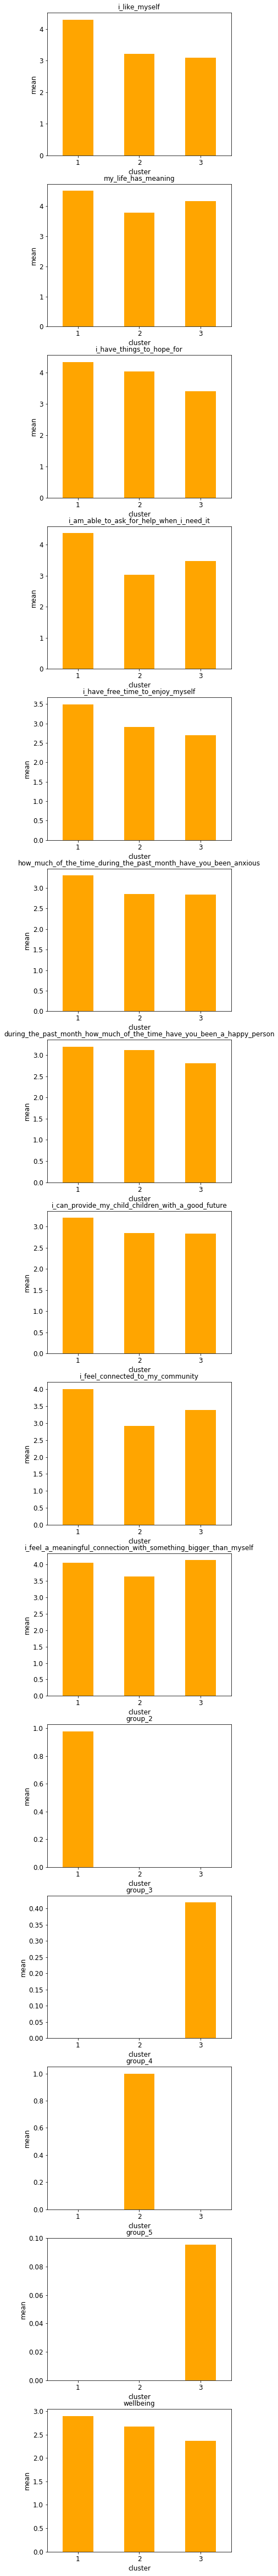

In [764]:
cluster_sig_columns = [col for col in list(rounded_results_significant.index) if "wellbeing" not in col]

df_cluster_differences = pd.concat([df_cluster[cluster_sig_columns], df_imputed_feature_selected['wellbeing']], axis=1)

# Append cluster column to this dataset

df_cluster_differences['cluster'] = final_clusters

# Now create a group-by

grouped_df_by_cluster = df_cluster_differences.groupby('cluster').agg(np.mean)

fig, ax = plt.subplots(15,1, figsize = (6,85))

for i in np.arange(0,len(grouped_df_by_cluster.columns)): 
    grouped_df_by_cluster.iloc[:,i].plot(kind="bar", rot=0, fontsize=12, ax=ax[i], color='orange')
    ax[i].set_title(grouped_df_by_cluster.columns[i], fontsize=12)
    ax[i].set_ylabel("mean", fontsize=12)
    ax[i].set_xlabel("cluster", fontsize=12)



In [765]:
df_cluster_differences_melt.head()

,index,i_like_myself,my_life_has_meaning,i_have_things_to_hope_for,i_am_able_to_ask_for_help_when_i_need_it,i_have_free_time_to_enjoy_myself,how_much_of_the_time_during_the_past_month_have_you_been_anxious,during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person,i_can_provide_my_child_children_with_a_good_future,i_feel_connected_to_my_community,i_feel_a_meaningful_connection_with_something_bigger_than_myself,group_2,group_3,group_4,group_5,cluster
0,102,1.0,1.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,0,0,0,0,1
1,103,1.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,5.0,4.0,0,0,0,0,3
2,104,4.0,5.0,3.0,4.0,1.0,1.0,3.0,3.0,4.0,5.0,0,0,0,0,3
3,105,5.0,5.0,5.0,5.0,5.0,3.0,2.0,3.0,2.0,5.0,0,0,0,0,3
4,106,3.0,5.0,5.0,4.0,2.0,4.0,3.0,4.0,2.0,5.0,0,0,0,0,3


In [766]:
df_cluster_differences.head()
df_cluster_differences_melt = df_cluster_differences.reset_index()
df_cluster_differences_melted = pd.melt(frame = df_cluster_differences_melt, id_vars = ["index","cluster"],
                                       var_name = "factor", value_name = "score")
df_cluster_differences_melted.head()

,index,cluster,factor,score
0,102,1,i_like_myself,1.0
1,103,3,i_like_myself,1.0
2,104,3,i_like_myself,4.0
3,105,3,i_like_myself,5.0
4,106,3,i_like_myself,3.0


In [770]:
df_cluster_differences_melted['factor'].unique()

array(['i_like_myself', 'my_life_has_meaning',
       'i_have_things_to_hope_for',
       'i_am_able_to_ask_for_help_when_i_need_it',
       'i_have_free_time_to_enjoy_myself',
       'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
       'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
       'i_can_provide_my_child_children_with_a_good_future',
       'i_feel_connected_to_my_community',
       'i_feel_a_meaningful_connection_with_something_bigger_than_myself',
       'group_2', 'group_3', 'group_4', 'group_5', 'wellbeing'],
      dtype=object)

In [768]:
wellbeing_factors = ['i_like_myself', 'my_life_has_meaning',
       'i_have_things_to_hope_for',
       'i_am_able_to_ask_for_help_when_i_need_it',
       'i_have_free_time_to_enjoy_myself',
       'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
       'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
       'i_can_provide_my_child_children_with_a_good_future',
       'i_feel_connected_to_my_community',
       'i_can_have_a_say_in_important_issues_in_my_community',
                    'wellbeing']



In [772]:
df_cluster_differences_melted.loc[df_cluster_differences_melted["factor"].isin(wellbeing_factors),"factor"].unique()

array(['i_like_myself', 'my_life_has_meaning',
       'i_have_things_to_hope_for',
       'i_am_able_to_ask_for_help_when_i_need_it',
       'i_have_free_time_to_enjoy_myself',
       'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
       'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
       'i_can_provide_my_child_children_with_a_good_future',
       'i_feel_connected_to_my_community', 'wellbeing'], dtype=object)

Text(0, 0.5, '')

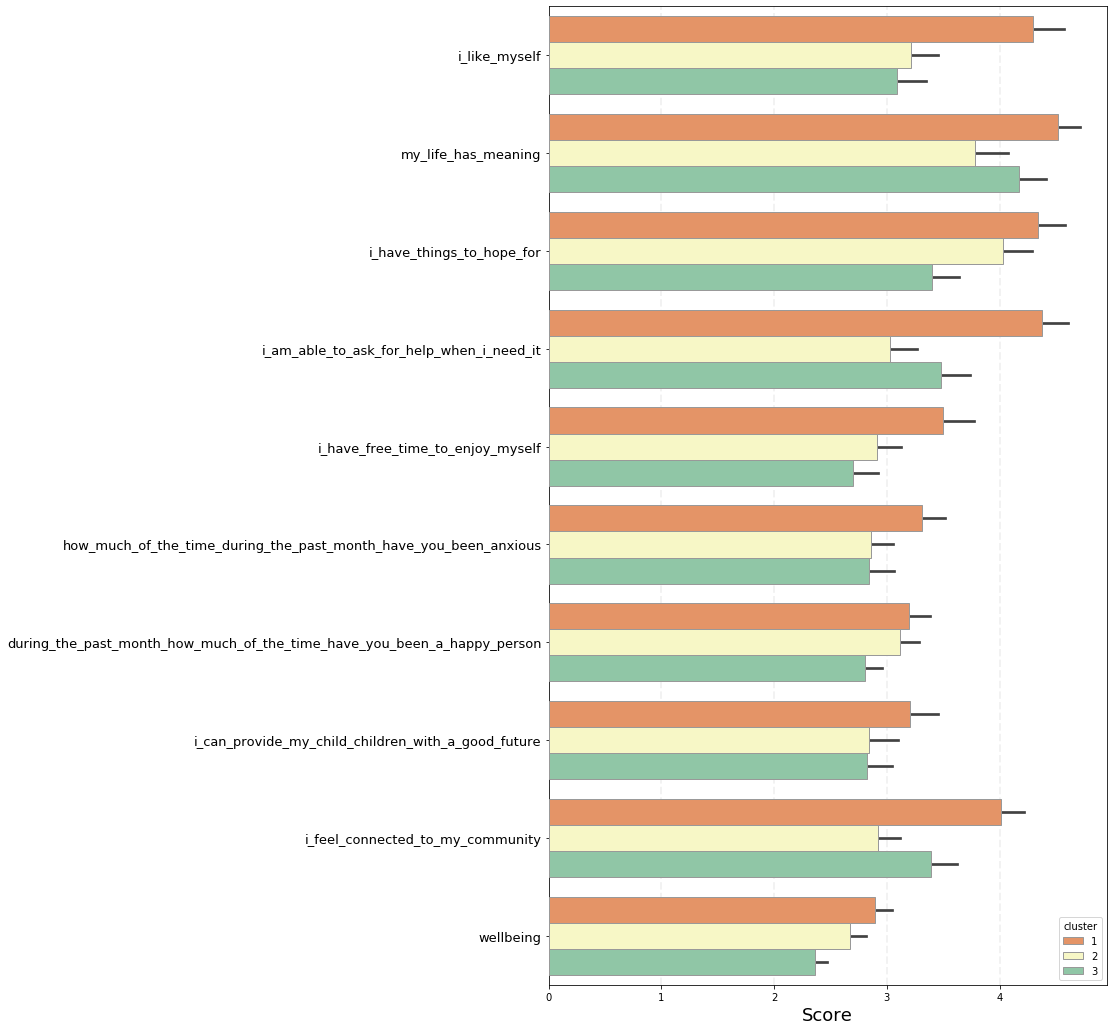

In [774]:
fig, ax = plt.subplots(1,1, figsize = (10,18))

# AGe by gender
ax.grid(zorder=0, color='gray', linestyle='--', linewidth=2, alpha = 0.1, axis = 'x')
sns.barplot(data = df_cluster_differences_melted.loc[df_cluster_differences_melted["factor"].isin(wellbeing_factors),:], 
            x = "score", 
            y = "factor", 
            hue = "cluster",
            palette = "Spectral", 
            ax = ax, 
            zorder=3,
            edgecolor=".6")
ax.set_yticklabels(['i_like_myself', 'my_life_has_meaning',
       'i_have_things_to_hope_for',
       'i_am_able_to_ask_for_help_when_i_need_it',
       'i_have_free_time_to_enjoy_myself',
       'how_much_of_the_time_during_the_past_month_have_you_been_anxious',
       'during_the_past_month_how_much_of_the_time_have_you_been_a_happy_person',
       'i_can_provide_my_child_children_with_a_good_future',
       'i_feel_connected_to_my_community', 'wellbeing'],fontsize = 13)
# # ax[0,1].set_title("Age", fontsize = 15)
ax.set_xlabel("Score", fontsize=18)
ax.set_ylabel("")
# ax.set_ylim(0,5)
# h, l = ax.get_legend_handles_labels() # Note the complexity of making thsi legend!! Otherwise, they lose color!
# ax.legend(h, ["Male","Female"], title="Gender")